In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")

In [56]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


FAVC -> Frequent consumption of high caloric food
FCVC -> Frequency of consumption of vegetables
NCP -> Number of main meals 
CAEC -> Consumption of food between meals
CH20 -> Consumption of water daily
CALC -> Consumption of alcohol

The attributes related with the physical condition are: 
SCC -> Calories consumption monitoring
FAF -> Physical activity frequency
TUE -> Time using technology devices
MTRANS -> Transportation used ()

In [57]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'WeightCategory'],
      dtype='object')

In [58]:
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

In [59]:
print(df['WeightCategory'].unique())
print(df['Age'].describe())


['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']
count    15533.000000
mean        23.816308
std          5.663167
min         14.000000
25%         20.000000
50%         22.771612
75%         26.000000
max         61.000000
Name: Age, dtype: float64


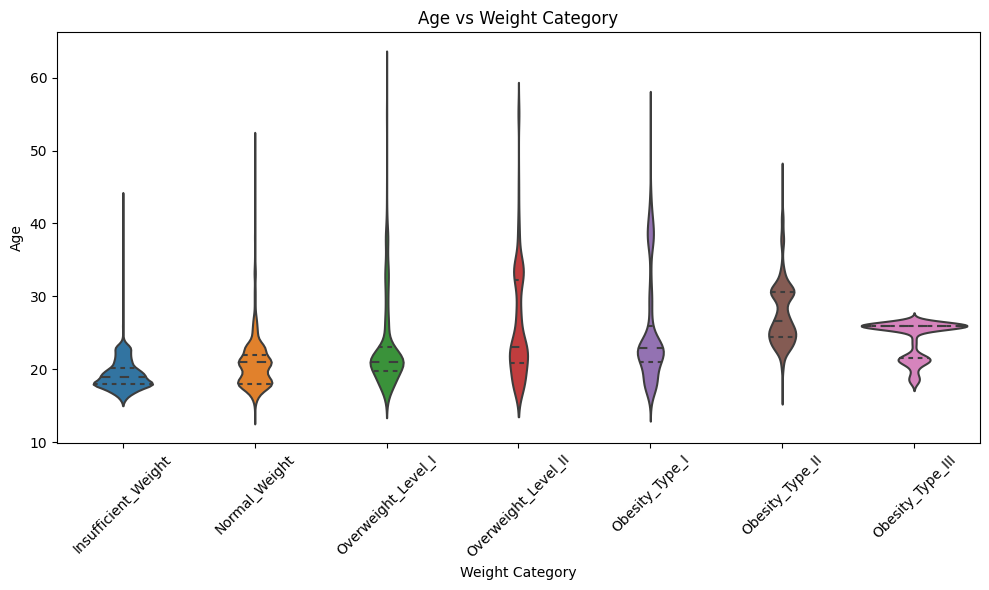

In [60]:

plt.figure(figsize=(10,6))
sns.violinplot(x='WeightCategory', y='Age', data=df, inner='quartile', order=order)
plt.title('Age vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Age')

plt.xticks(rotation=45)  # rotate labels by 45 degrees
plt.tight_layout()       # adjust spacing
plt.show()


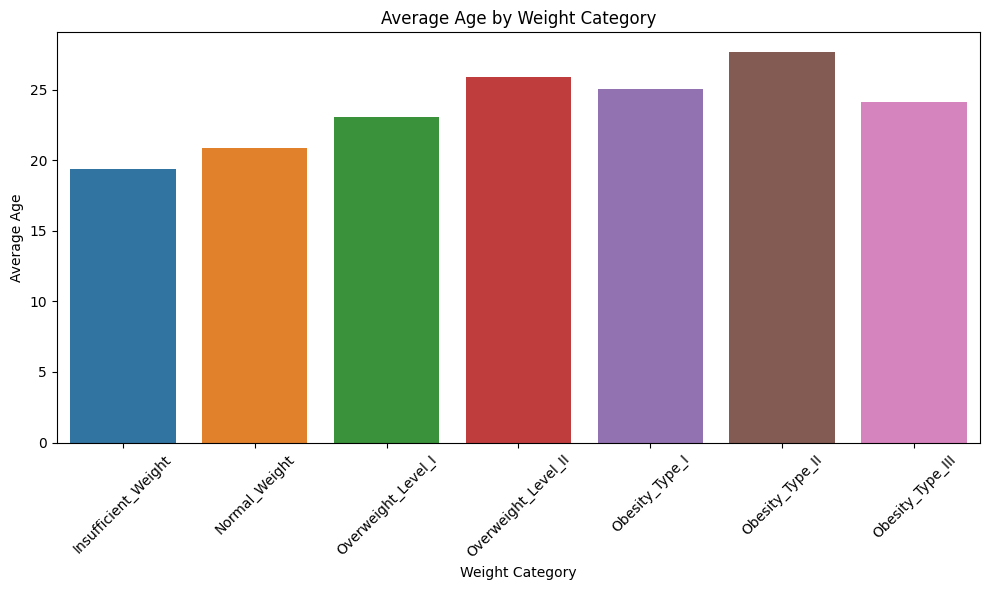

In [61]:
avg_age = df.groupby('WeightCategory')['Age'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='WeightCategory', y='Age', data=avg_age, order=order)
plt.title('Average Age by Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Average Age')

plt.xticks(rotation=45)  # rotate labels for readability
plt.tight_layout()       # prevent label cutoff
plt.show()


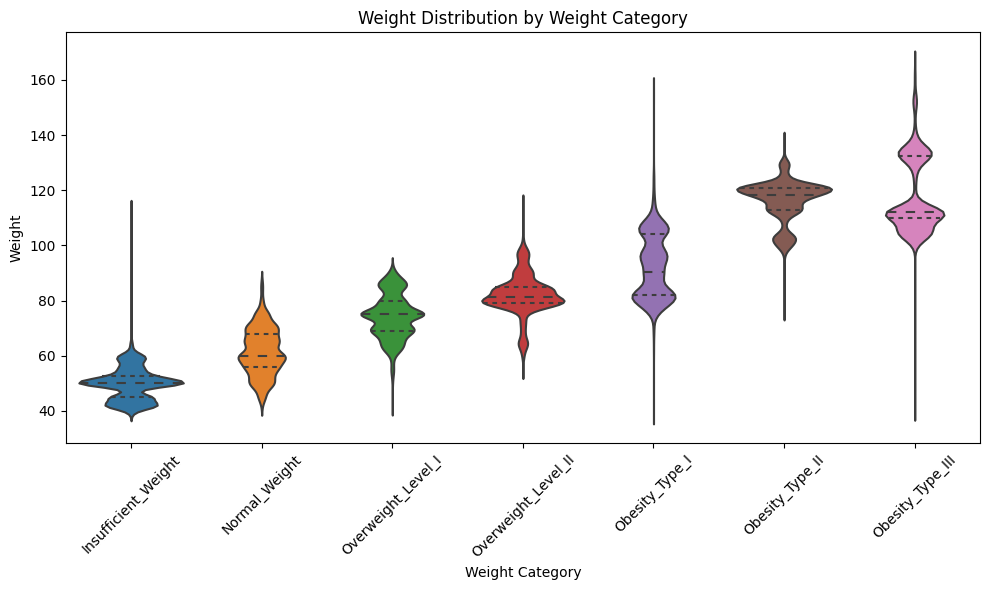

In [62]:
plt.figure(figsize=(10,6))
sns.violinplot(x='WeightCategory', y='Weight', data=df, inner='quartile', order=order)
plt.title('Weight Distribution by Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Weight')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


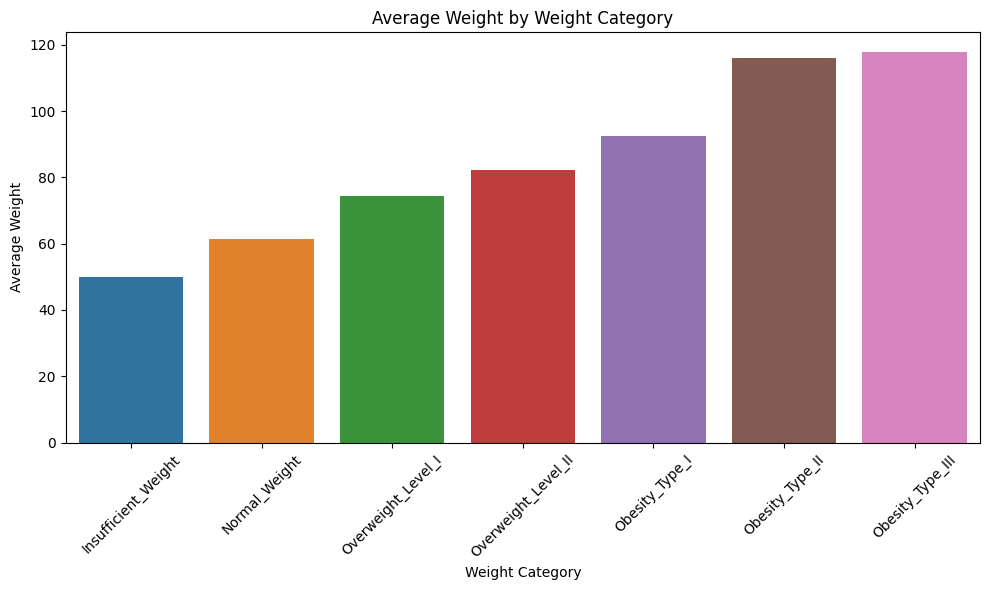

In [63]:
avg_weight = df.groupby('WeightCategory')['Weight'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='WeightCategory', y='Weight', data=avg_weight, order=order)
plt.title('Average Weight by Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Average Weight')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


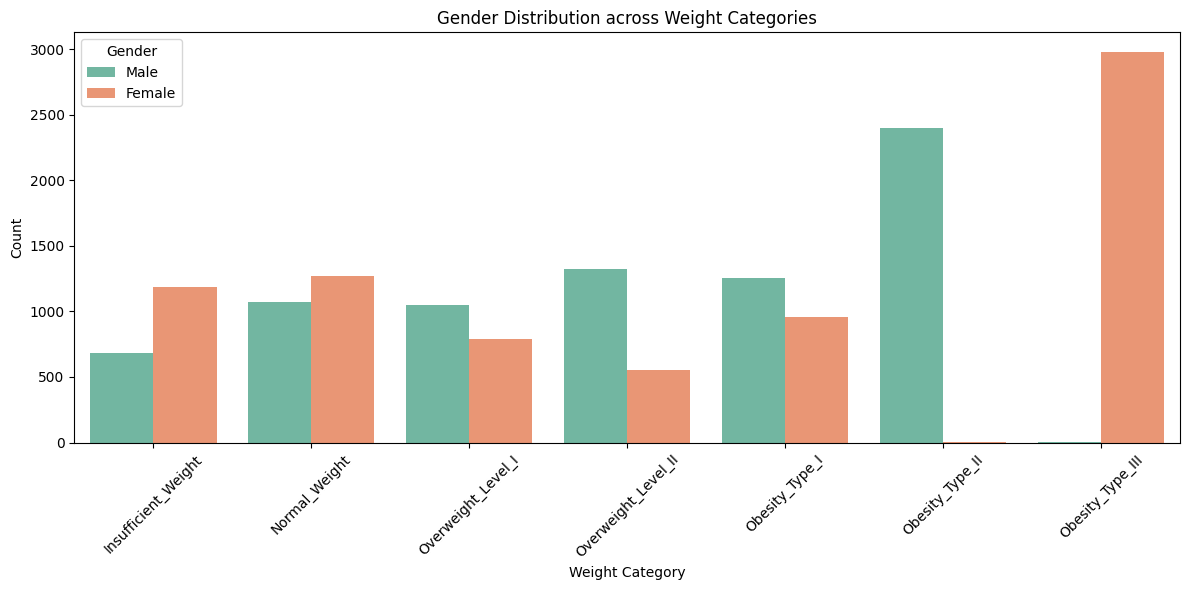

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(
    x='WeightCategory',
    hue='Gender',
    data=df,
    order=order,
    palette='Set2'
)

plt.title('Gender Distribution across Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


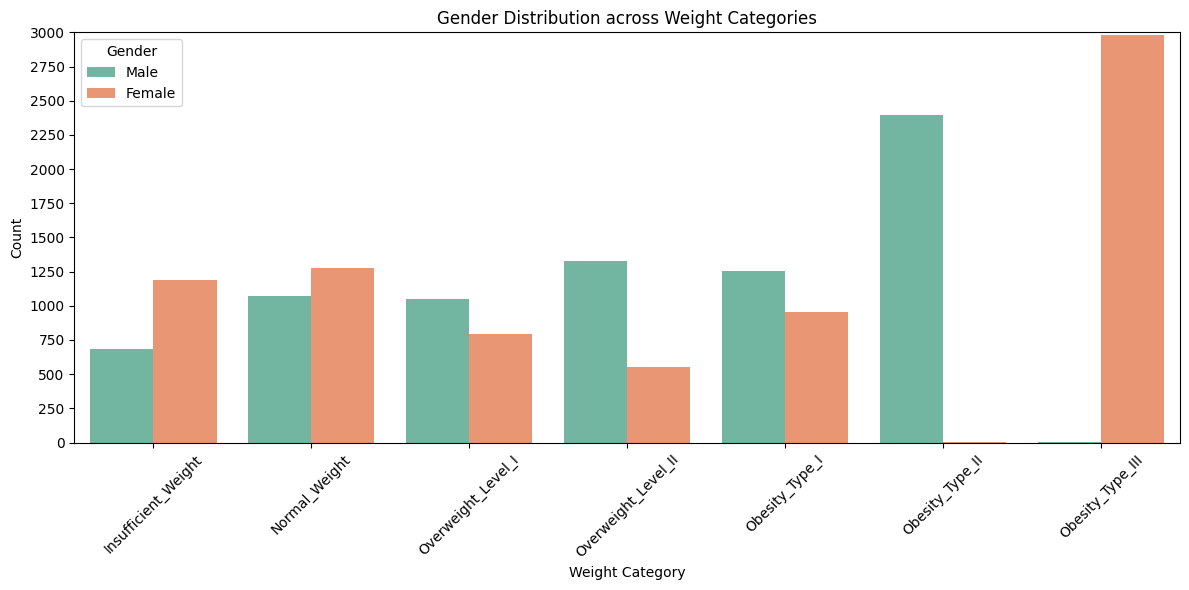

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(
    x='WeightCategory',
    hue='Gender',
    data=df,
    order=order,
    palette='Set2'
)

plt.title('Gender Distribution across Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Cap y-axis at 1500
plt.ylim(0, 1500)

# Set y-axis ticks at intervals of 250
plt.yticks(range(0, 3001, 250))

plt.tight_layout()
plt.show()


In [95]:
# Count of Gender per Weight Category
gender_counts = df.groupby(['WeightCategory', 'Gender']).size().unstack()
print(gender_counts)


Gender               Female  Male
WeightCategory                   
Insufficient_Weight    1188   682
Normal_Weight          1273  1072
Obesity_Type_I          955  1252
Obesity_Type_II           6  2397
Obesity_Type_III       2979     4
Overweight_Level_I      793  1051
Overweight_Level_II     556  1325


In [97]:
# Count of females in Obesity_Type_II
female_obesity_II = df[(df['WeightCategory'] == 'Obesity_Type_II') & (df['Gender'] == 'Female')]
print(female_obesity_II)


          id  Gender        Age    Height      Weight   
3196    3196  Female  37.542885  1.550000   77.205685  \
13770  13770  Female  30.000000  1.660000  125.000000   
13775  13775  Female  37.974483  1.542122   77.431678   
14572  14572  Female  32.000000  1.630000  102.000000   
14891  14891  Female  18.000000  1.620000   83.000000   
15026  15026  Female  28.977792  1.755978  112.287678   

      family_history_with_overweight  FAVC      FCVC       NCP       CAEC   
3196                             yes     3  2.000000  2.974204  Sometimes  \
13770                            yes     1  3.000000  3.000000  Sometimes   
13775                            yes     3  2.020785  2.463113  Sometimes   
14572                            yes     1  3.000000  1.000000  Sometimes   
14891                            yes     3  3.000000  1.000000  Sometimes   
15026                            yes     3  1.397468  3.907790  Sometimes   

       ...       CALC                 MTRANS   WeightCategor

In [99]:
# Count of males in Obesity_Type_III
male_obesity_III = df[(df['WeightCategory'] == 'Obesity_Type_III') & (df['Gender'] == 'Male')]
print(male_obesity_III)


          id Gender        Age    Height      Weight   
6909    6909   Male  26.000000  1.826970  111.946321  \
7206    7206   Male  22.906342  1.849307  122.813033   
8713    8713   Male  20.000000  1.700000   75.000000   
10479  10479   Male  21.948577  1.849998  122.024954   

      family_history_with_overweight  FAVC  FCVC       NCP       CAEC  ...   
6909                             yes     3   3.0  3.000000  Sometimes  ...  \
7206                             yes     3   3.0  2.989791  Sometimes  ...   
8713                             yes     3   3.0  3.000000  Sometimes  ...   
10479                            yes     3   3.0  2.806298  Sometimes  ...   

            CALC                 MTRANS    WeightCategory        BMI   
6909   Sometimes  Public_Transportation  Obesity_Type_III  33.538759  \
7206   Sometimes  Public_Transportation  Obesity_Type_III  35.910912   
8713   Sometimes  Public_Transportation  Obesity_Type_III  25.951557   
10479  Sometimes  Public_Transportation 

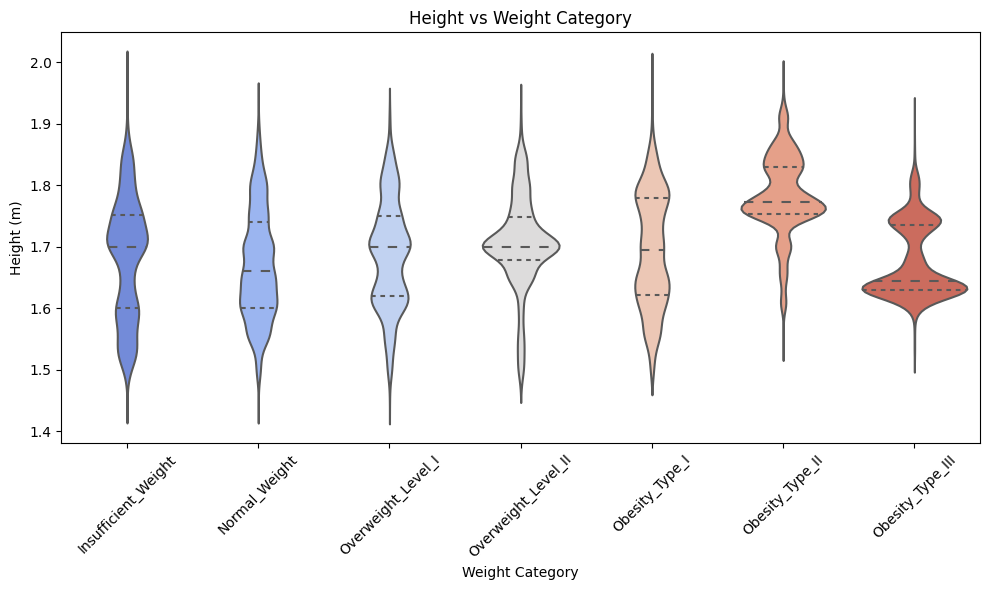

In [65]:
plt.figure(figsize=(10,6))
sns.violinplot(
    x='WeightCategory',
    y='Height',
    data=df,
    order=order,
    inner='quartile',
    palette='coolwarm'
)

plt.title('Height vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Height (m)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

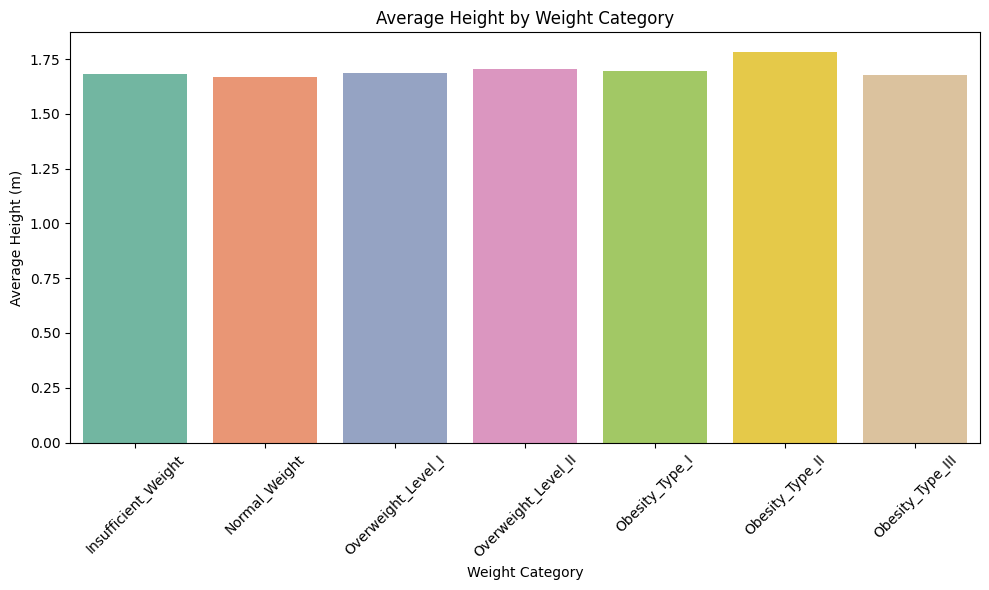

In [66]:
avg_height = df.groupby('WeightCategory')['Height'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='WeightCategory',
    y='Height',
    data=avg_height,
    order=order,
    palette='Set2'
)

plt.title('Average Height by Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Average Height (m)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


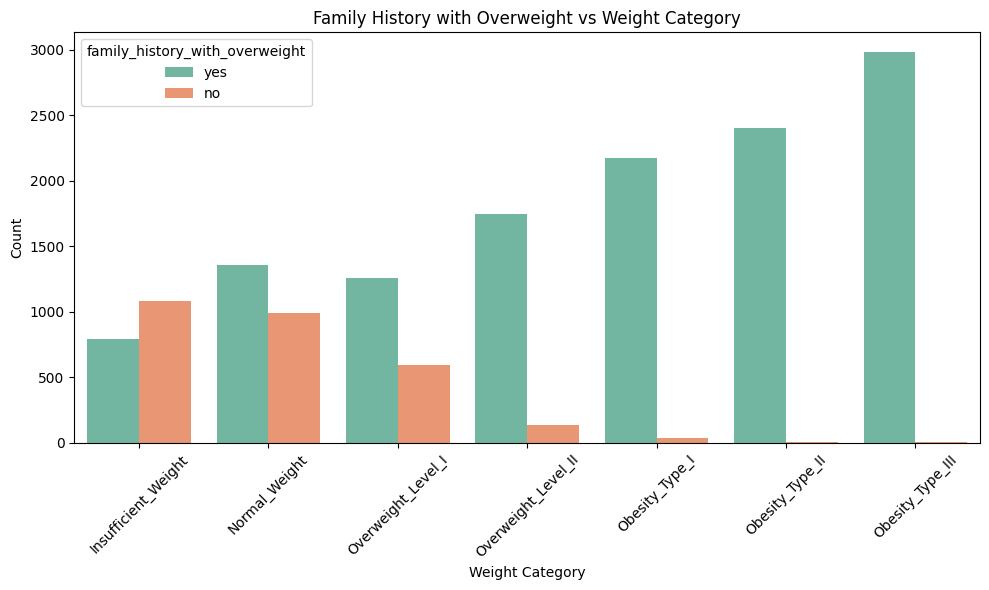

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='WeightCategory',
    hue='family_history_with_overweight',
    data=df,
    order=order,
    palette='Set2'
)
plt.title('Family History with Overweight vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


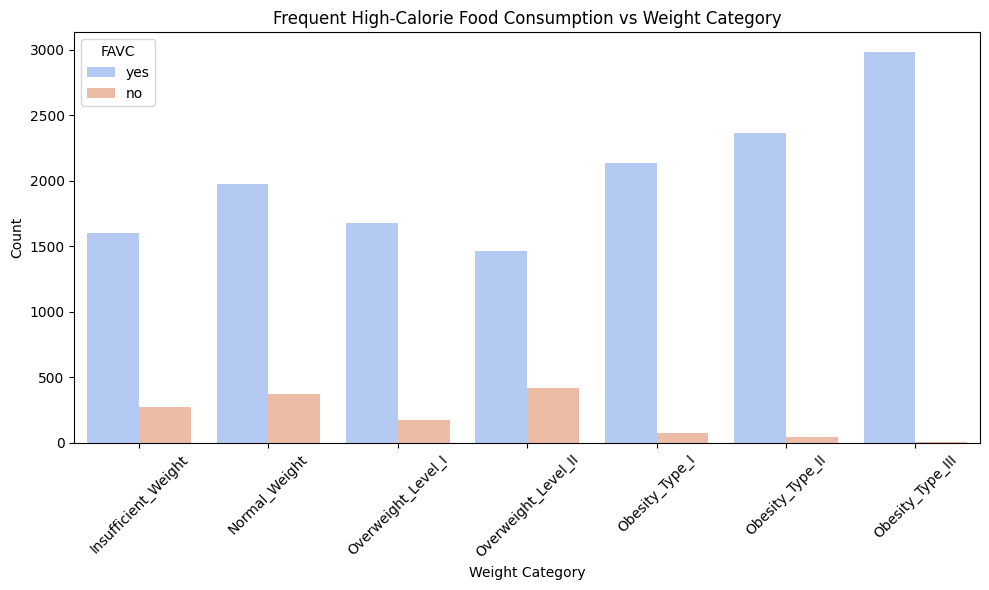

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='WeightCategory',
    hue='FAVC',
    data=df,
    order=order,
    palette='coolwarm'
)
plt.title('Frequent High-Calorie Food Consumption vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


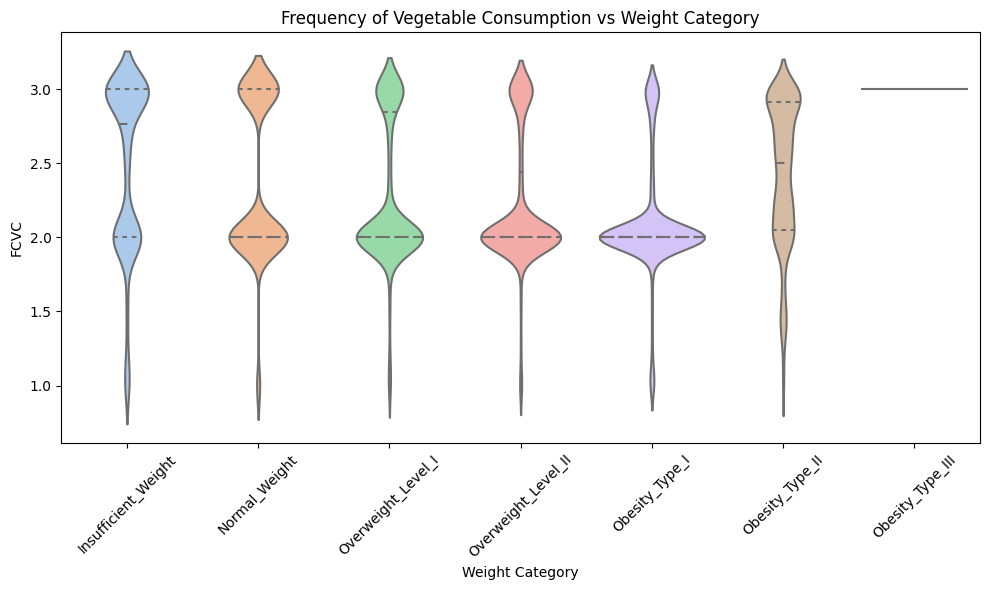

In [69]:
plt.figure(figsize=(10,6))
sns.violinplot(
    x='WeightCategory',
    y='FCVC',
    data=df,
    order=order,
    inner='quartile',
    palette='pastel'
)
plt.title('Frequency of Vegetable Consumption vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('FCVC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

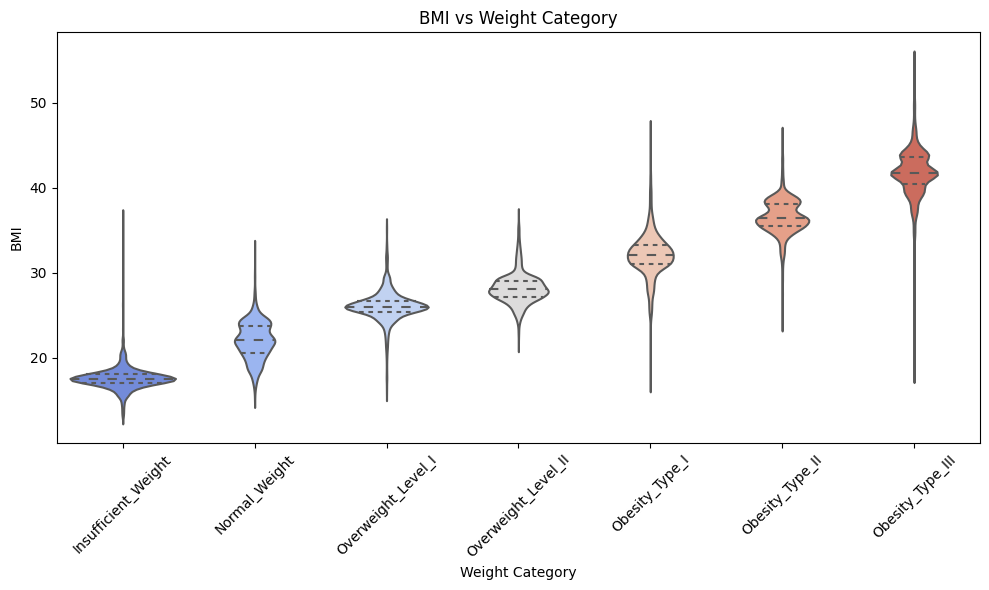

In [71]:
plt.figure(figsize=(10,6))
sns.violinplot(
    x='WeightCategory',
    y='BMI',
    data=df,
    order=order,
    inner='quartile',
    palette='coolwarm'
)
plt.title('BMI vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

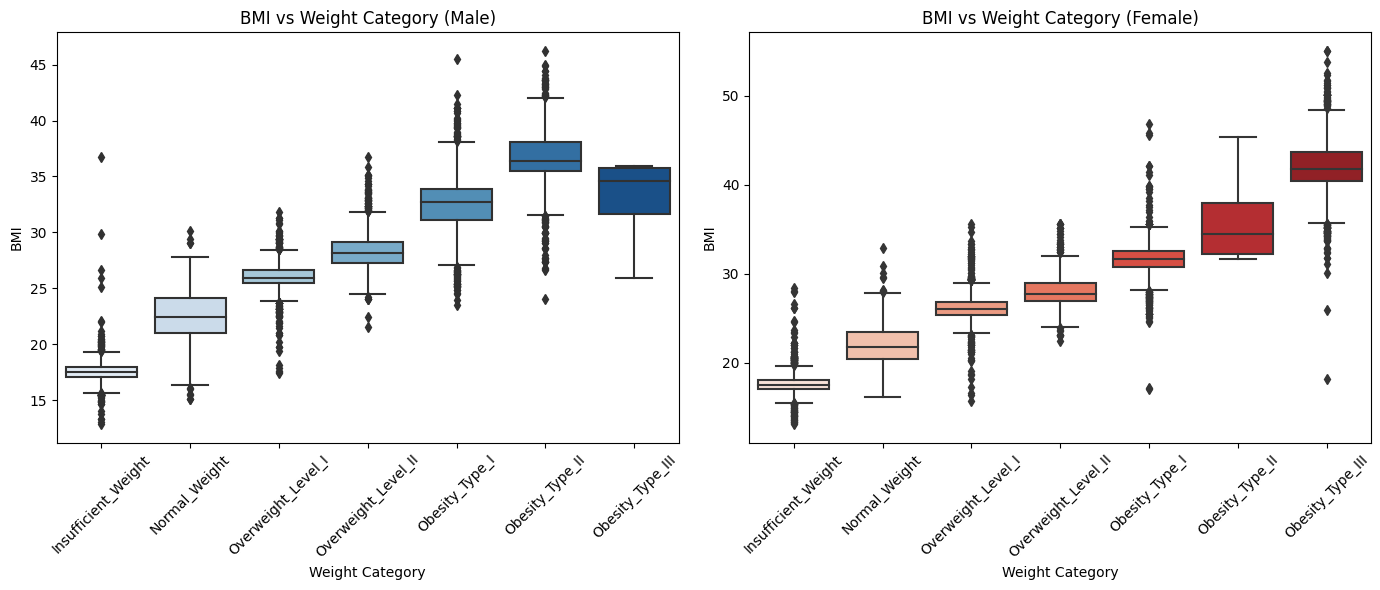

In [72]:
plt.figure(figsize=(14,6))

# Male
plt.subplot(1, 2, 1)
sns.boxplot(
    x='WeightCategory',
    y='BMI',
    data=df[df['Gender'] == 'Male'],
    order=order,
    palette='Blues'
)
plt.title('BMI vs Weight Category (Male)')
plt.xlabel('Weight Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)

# Female
plt.subplot(1, 2, 2)
sns.boxplot(
    x='WeightCategory',
    y='BMI',
    data=df[df['Gender'] == 'Female'],
    order=order,
    palette='Reds'
)
plt.title('BMI vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [73]:
# # Convert FAVC to numeric (float)
# df['FAVC'] = pd.to_numeric(df['FAVC'], errors='coerce')

# # Optional: check for NaNs after conversion
# print(df['FAVC'].isna().sum())


In [75]:
# Example mapping for FAVC
mapping = {
    'yes': 3,
    'no': 1,
    'sometimes': 2
}

df['FAVC'] = df['FAVC'].replace(mapping)


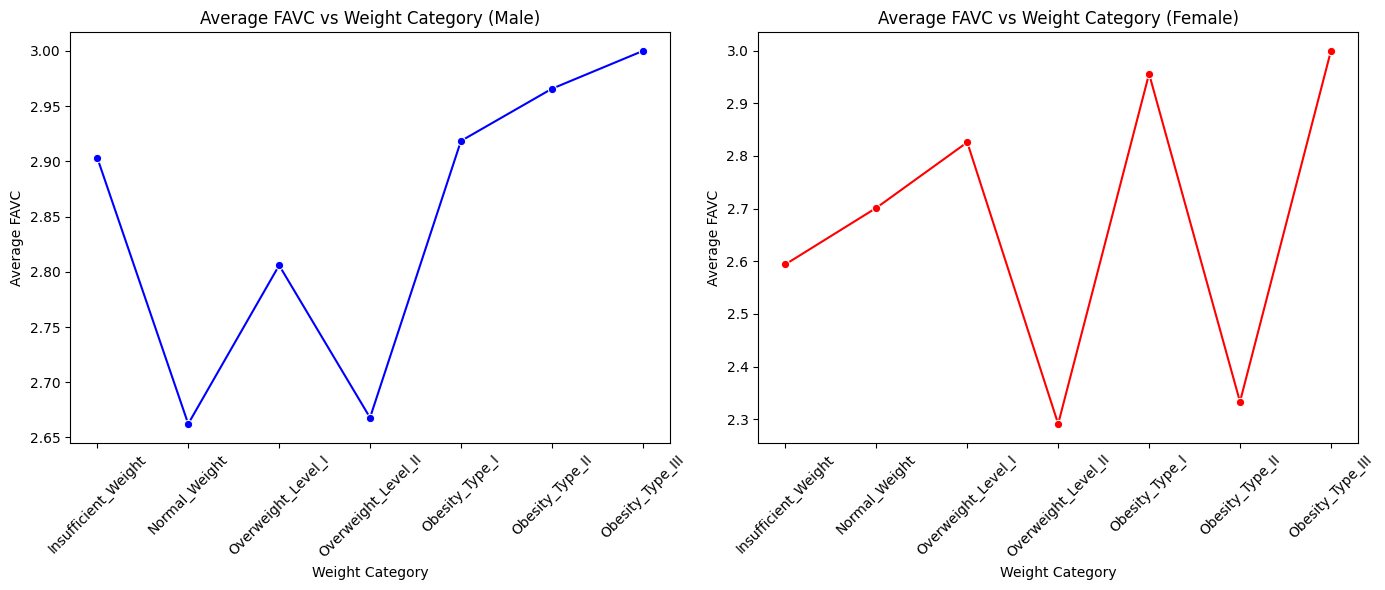

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

# Male
plt.subplot(1, 2, 1)
avg_favc_male = df[df['Gender'] == 'Male'].groupby('WeightCategory')['FAVC'].mean().reindex(order)
sns.lineplot(x=avg_favc_male.index, y=avg_favc_male.values, marker='o', color='blue')
plt.title('Average FAVC vs Weight Category (Male)')
plt.xlabel('Weight Category')
plt.ylabel('Average FAVC')
plt.xticks(rotation=45)

# Female
plt.subplot(1, 2, 2)
avg_favc_female = df[df['Gender'] == 'Female'].groupby('WeightCategory')['FAVC'].mean().reindex(order)
sns.lineplot(x=avg_favc_female.index, y=avg_favc_female.values, marker='o', color='red')
plt.title('Average FAVC vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('Average FAVC')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


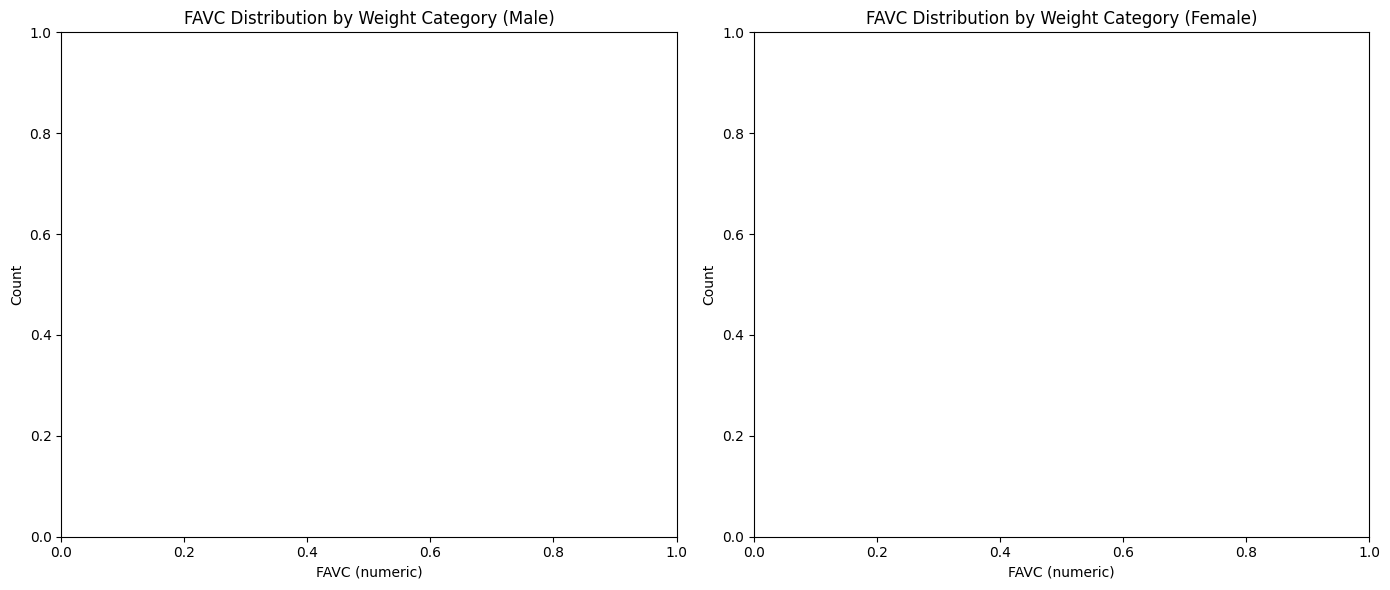

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map FAVC to numeric if not done
favc_mapping = {'no': 1, 'sometimes': 2, 'yes': 3}
df['FAVC_num'] = df['FAVC'].map(favc_mapping)

plt.figure(figsize=(14,6))

# Male
plt.subplot(1, 2, 1)
sns.histplot(
    data=df[df['Gender']=='Male'],
    x='FAVC_num',
    hue='WeightCategory',
    multiple='dodge',
    bins=3,
    palette='Blues',
    shrink=0.8
)
plt.title('FAVC Distribution by Weight Category (Male)')
plt.xlabel('FAVC (numeric)')
plt.ylabel('Count')

# Female
plt.subplot(1, 2, 2)
sns.histplot(
    data=df[df['Gender']=='Female'],
    x='FAVC_num',
    hue='WeightCategory',
    multiple='dodge',
    bins=3,
    palette='Reds',
    shrink=0.8
)
plt.title('FAVC Distribution by Weight Category (Female)')
plt.xlabel('FAVC (numeric)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


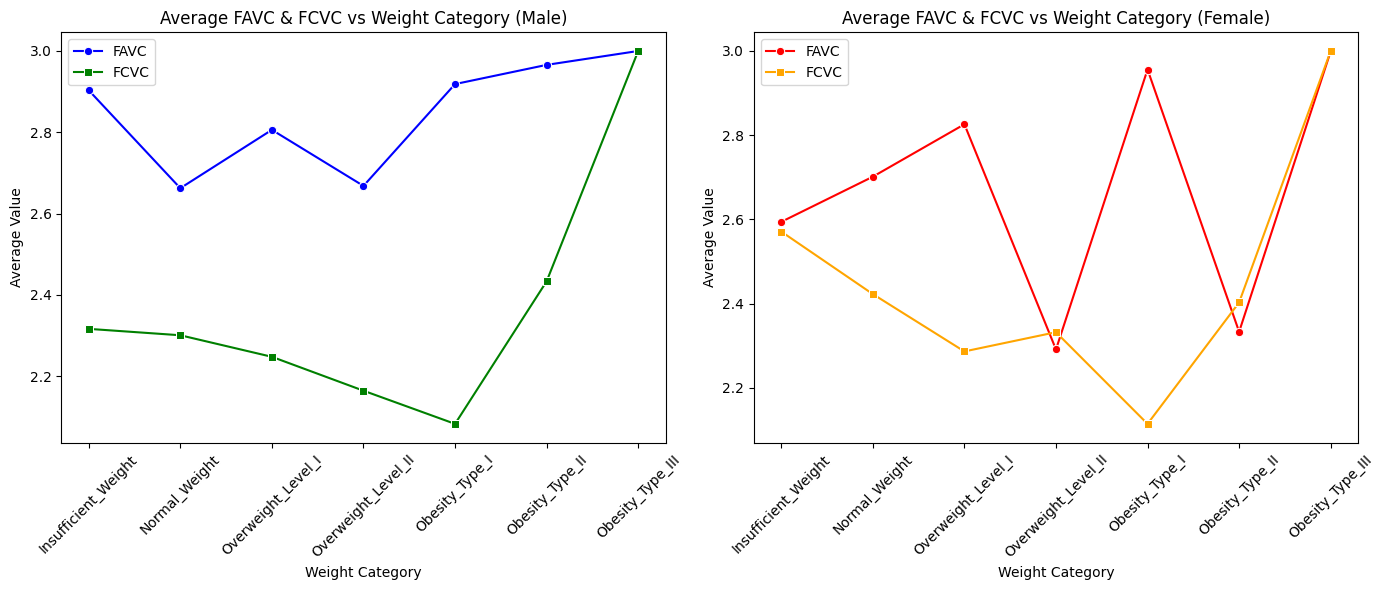

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

# --- Male ---
plt.subplot(1, 2, 1)
df_male = df[df['Gender'] == 'Male']

avg_favc_male = df_male.groupby('WeightCategory')['FAVC'].mean().reindex(order)
avg_fcvc_male = df_male.groupby('WeightCategory')['FCVC'].mean().reindex(order)

sns.lineplot(x=avg_favc_male.index, y=avg_favc_male.values, marker='o', color='blue', label='FAVC')
sns.lineplot(x=avg_fcvc_male.index, y=avg_fcvc_male.values, marker='s', color='green', label='FCVC')

plt.title('Average FAVC & FCVC vs Weight Category (Male)')
plt.xlabel('Weight Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()

# --- Female ---
plt.subplot(1, 2, 2)
df_female = df[df['Gender'] == 'Female']

avg_favc_female = df_female.groupby('WeightCategory')['FAVC'].mean().reindex(order)
avg_fcvc_female = df_female.groupby('WeightCategory')['FCVC'].mean().reindex(order)

sns.lineplot(x=avg_favc_female.index, y=avg_favc_female.values, marker='o', color='red', label='FAVC')
sns.lineplot(x=avg_fcvc_female.index, y=avg_fcvc_female.values, marker='s', color='orange', label='FCVC')

plt.title('Average FAVC & FCVC vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


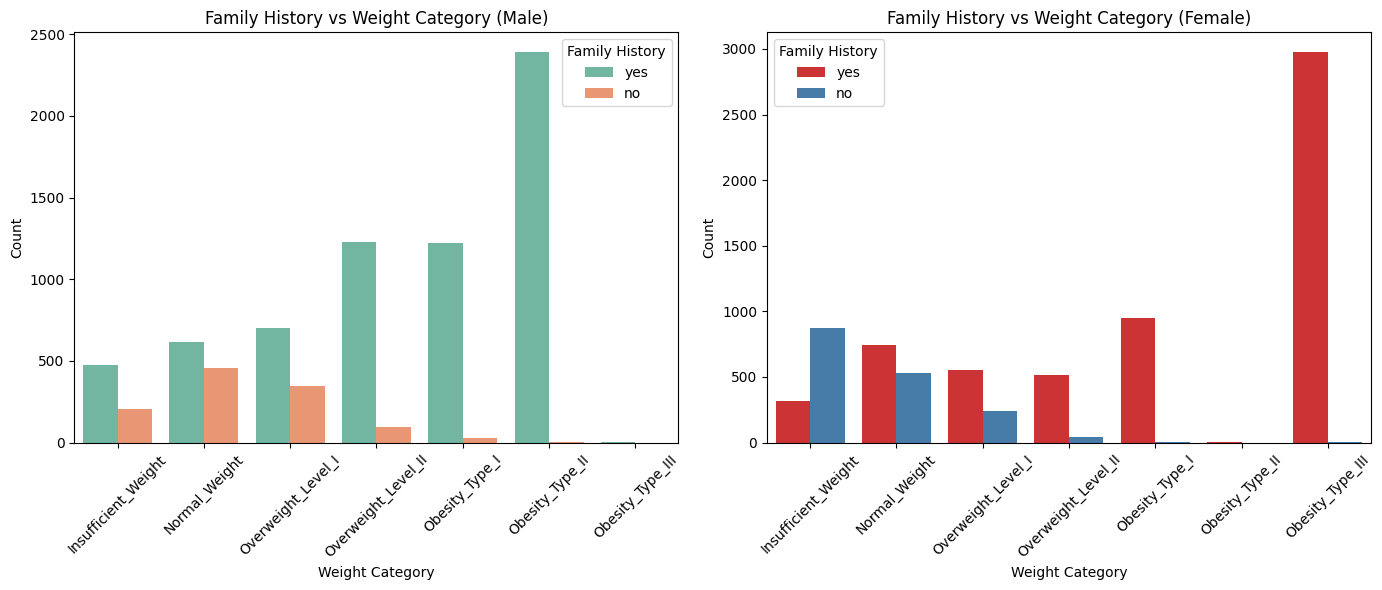

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

# --- Male ---
plt.subplot(1, 2, 1)
sns.countplot(
    x='WeightCategory',
    hue='family_history_with_overweight',
    data=df[df['Gender'] == 'Male'],
    order=order,
    palette='Set2'
)
plt.title('Family History vs Weight Category (Male)')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Family History')

# --- Female ---
plt.subplot(1, 2, 2)
sns.countplot(
    x='WeightCategory',
    hue='family_history_with_overweight',
    data=df[df['Gender'] == 'Female'],
    order=order,
    palette='Set1'
)
plt.title('Family History vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Family History')

plt.tight_layout()
plt.show()


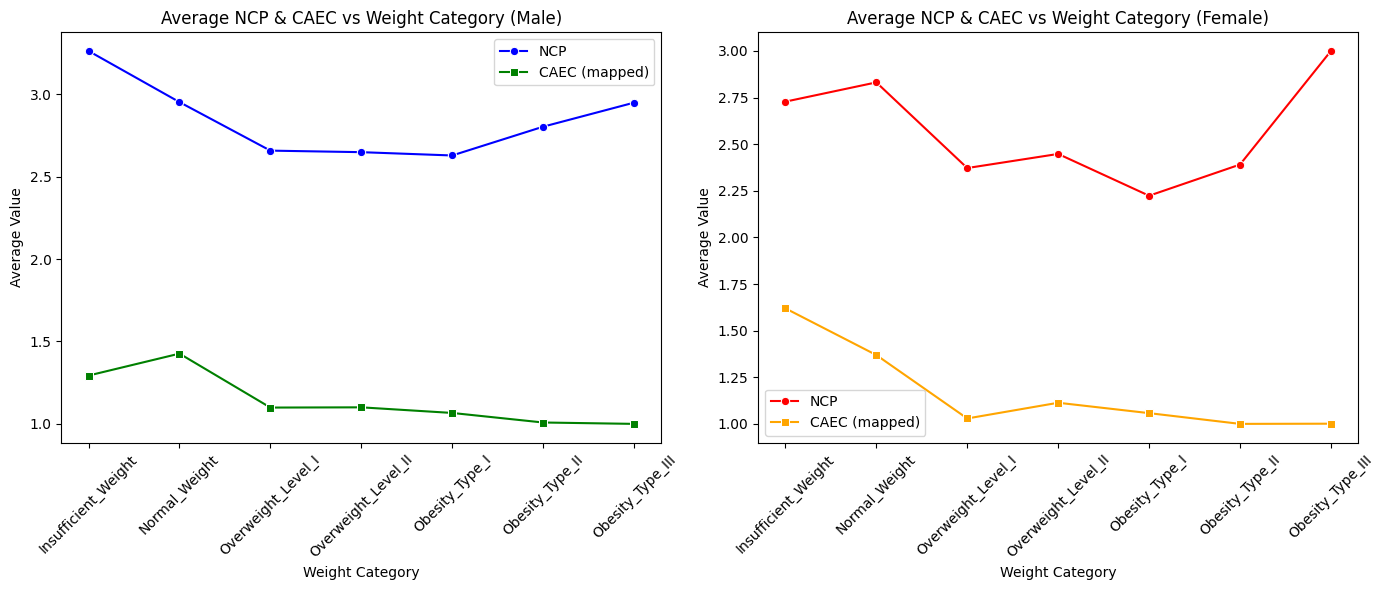

In [79]:
# Mapping
caec_mapping = {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}
df['CAEC_num'] = df['CAEC'].replace(caec_mapping)

plt.figure(figsize=(14,6))

# Male
plt.subplot(1, 2, 1)
df_male = df[df['Gender']=='Male']
avg_ncp_male = df_male.groupby('WeightCategory')['NCP'].mean().reindex(order)
avg_caec_male = df_male.groupby('WeightCategory')['CAEC_num'].mean().reindex(order)

sns.lineplot(x=avg_ncp_male.index, y=avg_ncp_male.values, marker='o', color='blue', label='NCP')
sns.lineplot(x=avg_caec_male.index, y=avg_caec_male.values, marker='s', color='green', label='CAEC (mapped)')

plt.title('Average NCP & CAEC vs Weight Category (Male)')
plt.xlabel('Weight Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()

# Female
plt.subplot(1, 2, 2)
df_female = df[df['Gender']=='Female']
avg_ncp_female = df_female.groupby('WeightCategory')['NCP'].mean().reindex(order)
avg_caec_female = df_female.groupby('WeightCategory')['CAEC_num'].mean().reindex(order)

sns.lineplot(x=avg_ncp_female.index, y=avg_ncp_female.values, marker='o', color='red', label='NCP')
sns.lineplot(x=avg_caec_female.index, y=avg_caec_female.values, marker='s', color='orange', label='CAEC (mapped)')

plt.title('Average NCP & CAEC vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [100]:
# Count of each transportation type
transport_counts = df['MTRANS'].value_counts()
print(transport_counts)


MTRANS
Public_Transportation    12470
Automobile                2669
Walking                    340
Motorbike                   30
Bike                        24
Name: count, dtype: int64


merge automobile motorbike and bike

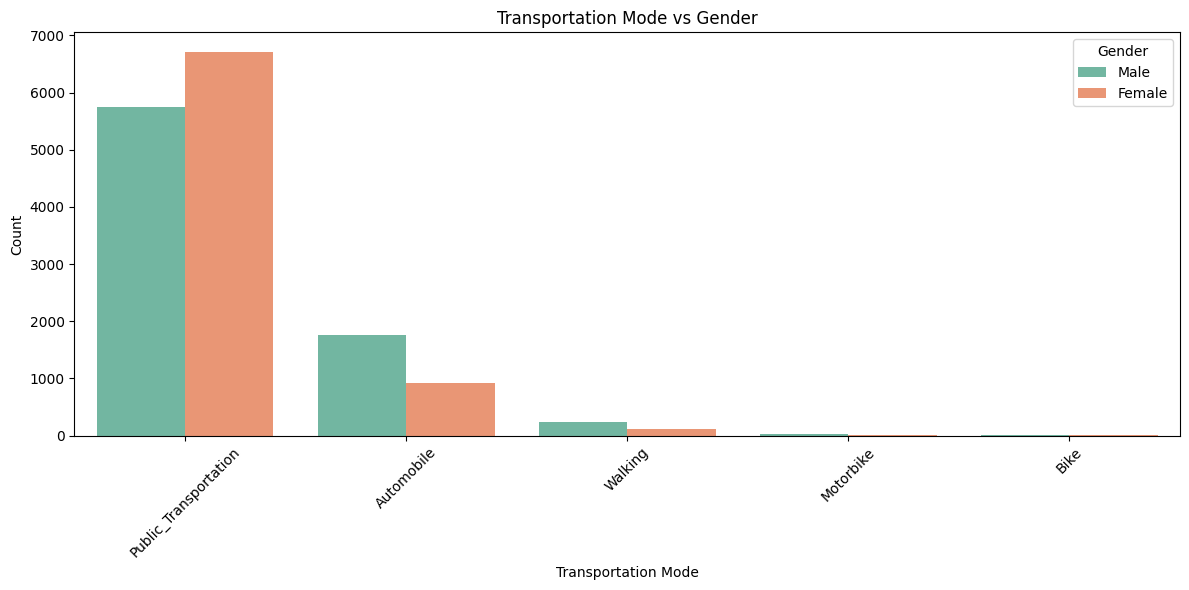

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(
    x='MTRANS',
    hue='Gender',
    data=df,
    palette='Set2'
)

plt.title('Transportation Mode vs Gender')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


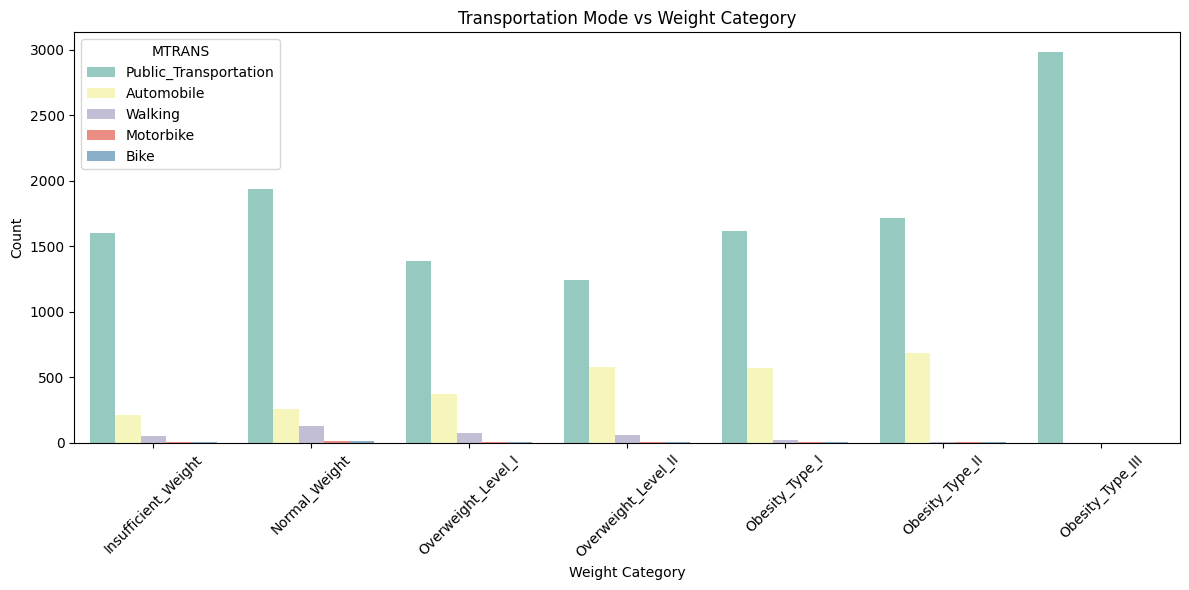

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(
    x='WeightCategory',
    hue='MTRANS',
    data=df,
    order=order,  # to keep WeightCategory in your defined order
    palette='Set3'
)

plt.title('Transportation Mode vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


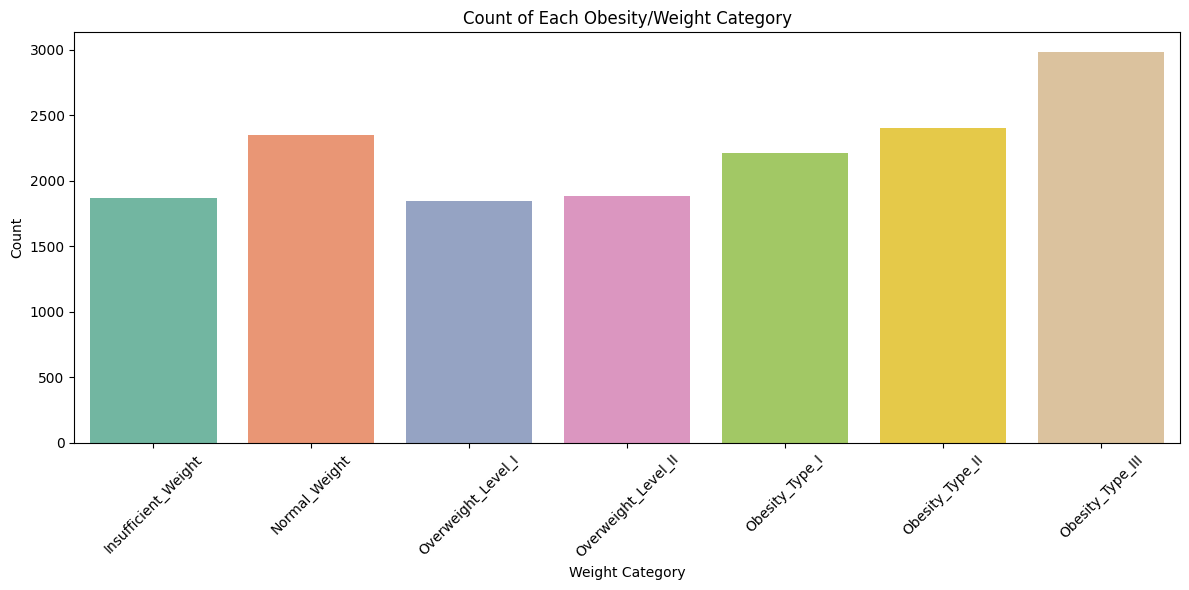

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(
    x='WeightCategory',
    data=df,
    order=order,
    palette='Set2'
)

plt.title('Count of Each Obesity/Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [104]:
print(df['FAF'].min(), df['FAF'].max())
print(df['FAF'].unique())  # to see all possible values


0.0 3.0
[0.       1.       0.866045 ... 0.325313 0.42777  1.804157]


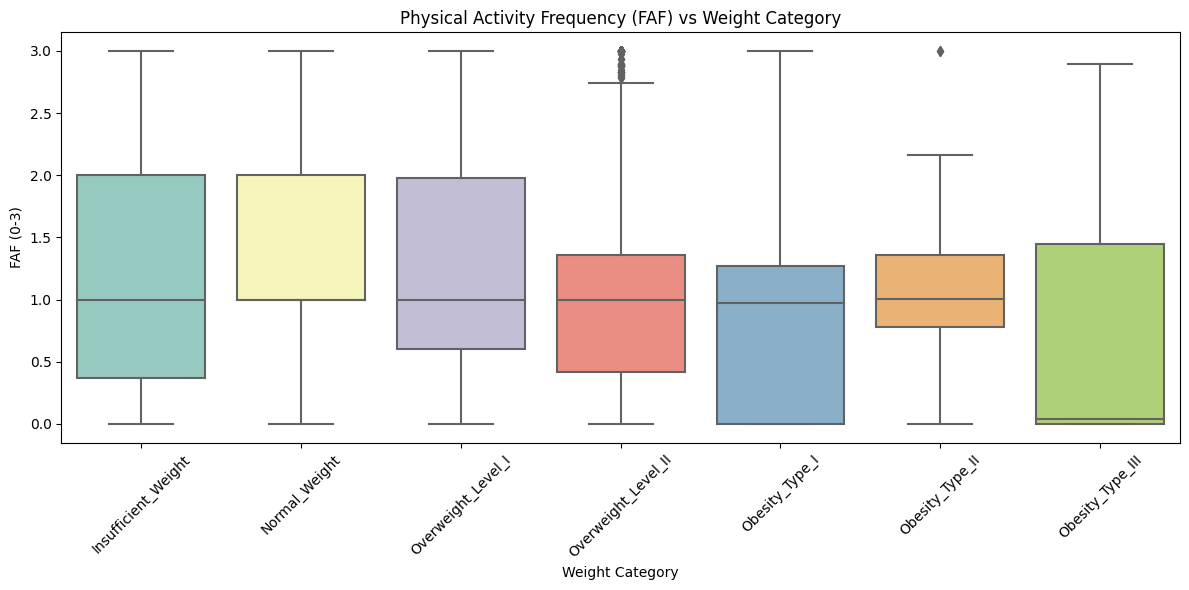

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(
    x='WeightCategory',
    y='FAF',
    data=df,
    order=order,
    palette='Set3'
)

plt.title('Physical Activity Frequency (FAF) vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('FAF (0-3)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


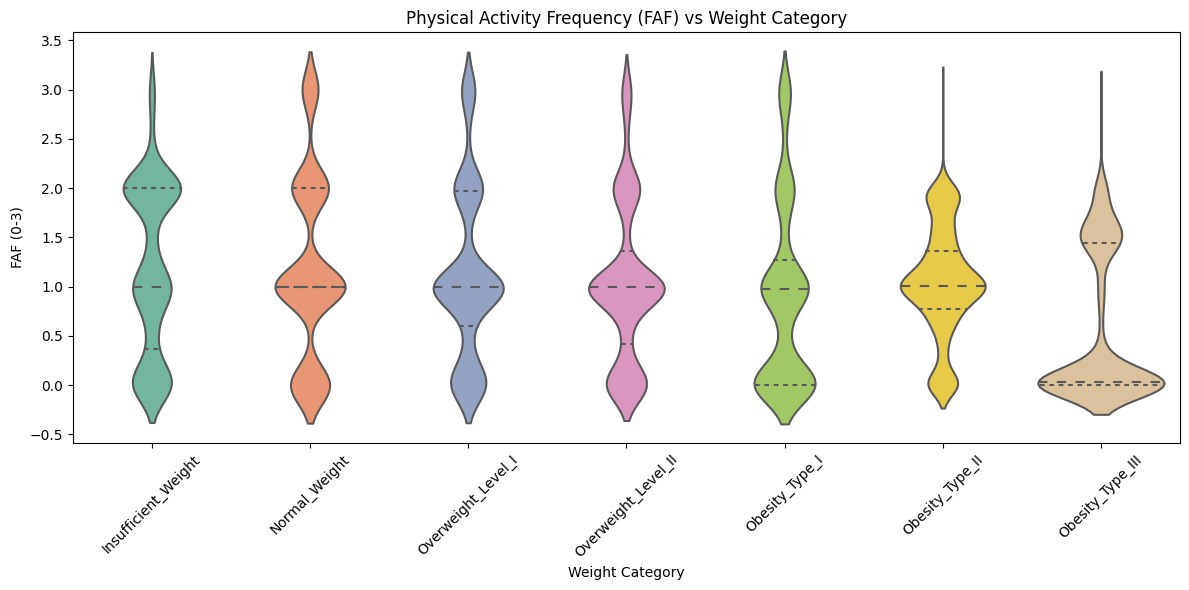

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.violinplot(
    x='WeightCategory',
    y='FAF',
    data=df,
    order=order,
    inner='quartile',  # shows median and quartiles
    palette='Set2'
)

plt.title('Physical Activity Frequency (FAF) vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('FAF (0-3)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


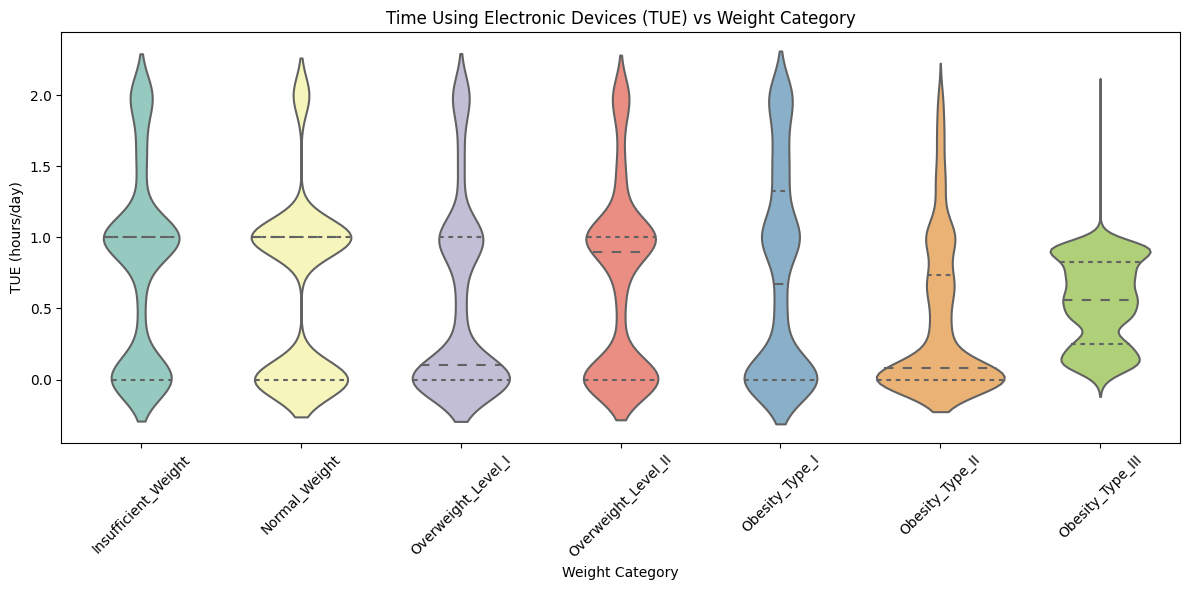

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.violinplot(
    x='WeightCategory',
    y='TUE',
    data=df,
    order=order,
    inner='quartile',  # shows median and quartiles
    palette='Set3'
)

plt.title('Time Using Electronic Devices (TUE) vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('TUE (hours/day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


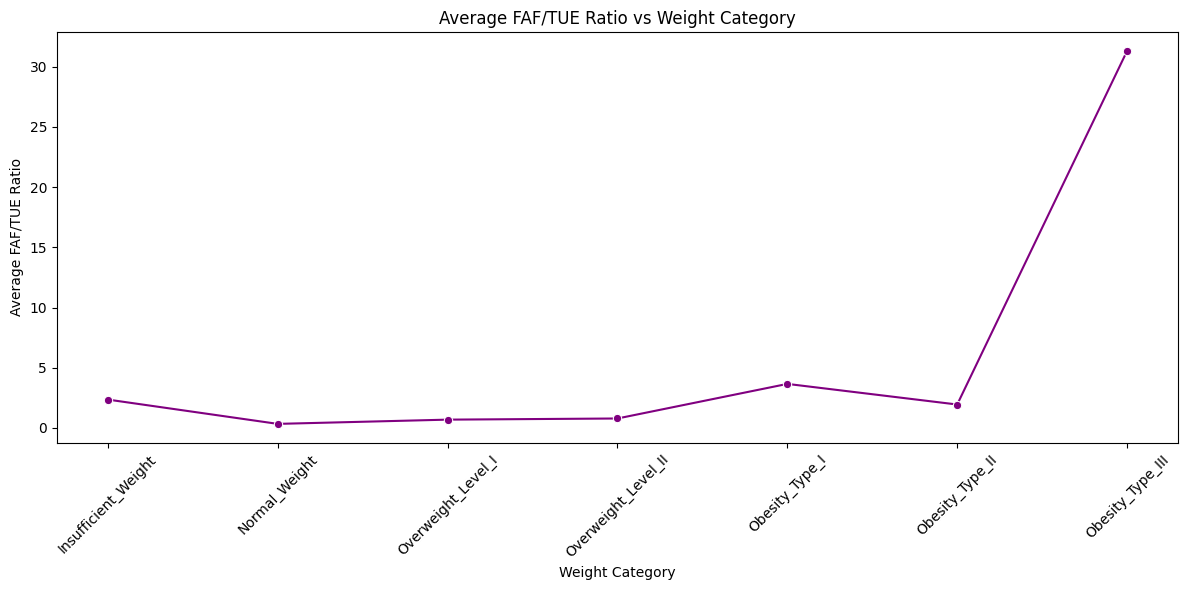

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create new feature: FAF / TUE ratio
df['FAF_TUE_ratio'] = df['TUE'] / df['FAF']

# Handle any potential division by zero
df['FAF_TUE_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)
df['FAF_TUE_ratio'].fillna(0, inplace=True)

# Calculate average ratio per weight category
avg_ratio = df.groupby('WeightCategory')['FAF_TUE_ratio'].mean().reindex(order)

# Plot line graph
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_ratio.index, y=avg_ratio.values, marker='o', color='purple')
plt.title('Average FAF/TUE Ratio vs Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Average FAF/TUE Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


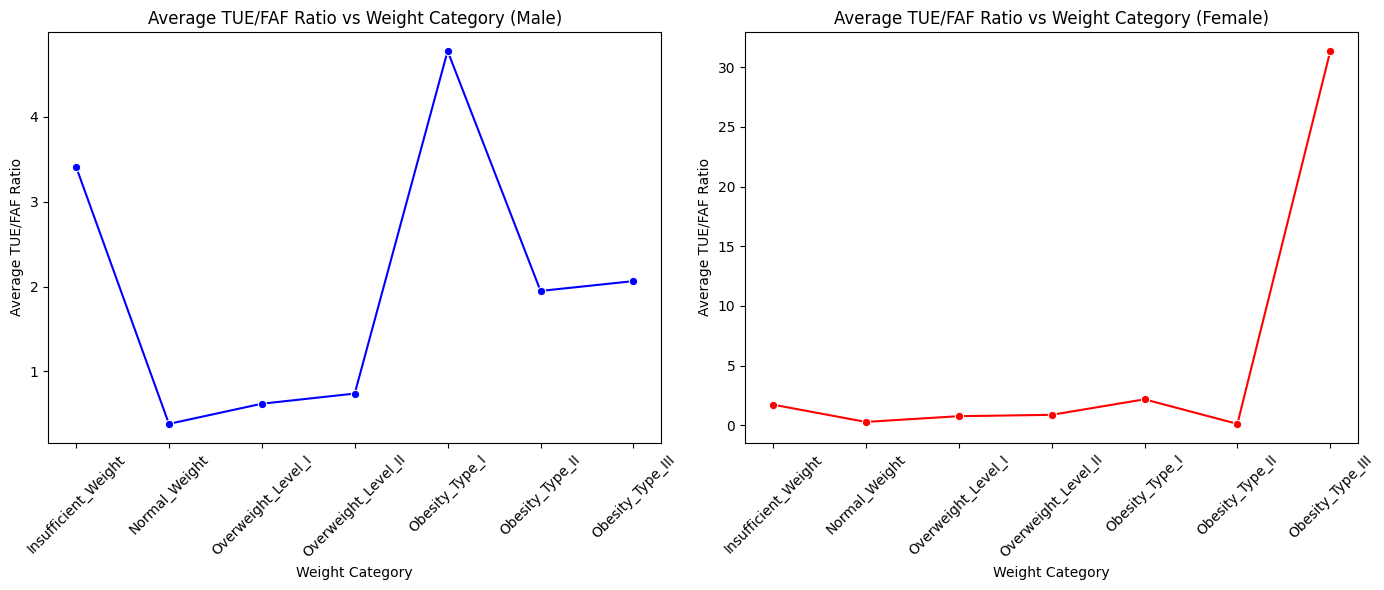

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the ratio column
df['TUE_FAF_ratio'] = df['TUE'] / df['FAF']
df['TUE_FAF_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)
df['TUE_FAF_ratio'].fillna(0, inplace=True)

plt.figure(figsize=(14,6))

# Male
plt.subplot(1, 2, 1)
avg_ratio_male = df[df['Gender'] == 'Male'].groupby('WeightCategory')['TUE_FAF_ratio'].mean().reindex(order)
sns.lineplot(x=avg_ratio_male.index, y=avg_ratio_male.values, marker='o', color='blue')
plt.title('Average TUE/FAF Ratio vs Weight Category (Male)')
plt.xlabel('Weight Category')
plt.ylabel('Average TUE/FAF Ratio')
plt.xticks(rotation=45)

# Female
plt.subplot(1, 2, 2)
avg_ratio_female = df[df['Gender'] == 'Female'].groupby('WeightCategory')['TUE_FAF_ratio'].mean().reindex(order)
sns.lineplot(x=avg_ratio_female.index, y=avg_ratio_female.values, marker='o', color='red')
plt.title('Average TUE/FAF Ratio vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('Average TUE/FAF Ratio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


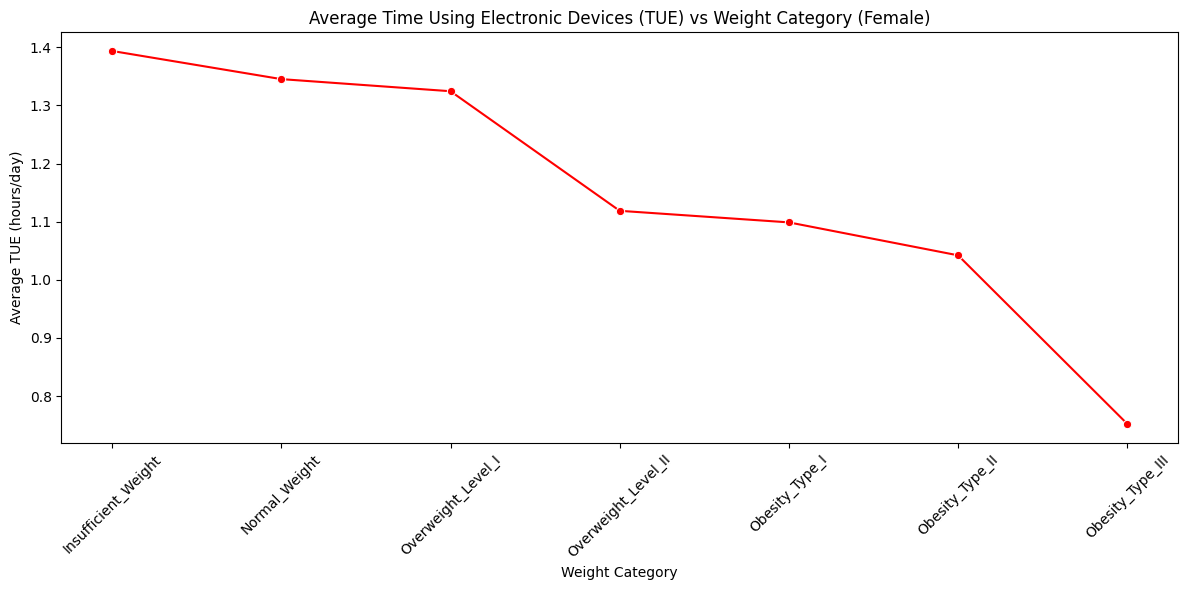

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average TUE per weight category for females
avg_tue_female = df[df['Gender'] == 'Male'].groupby('WeightCategory')['FAF'].mean().reindex(order)

# Plot line graph
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_tue_female.index, y=avg_tue_female.values, marker='o', color='red')

plt.title('Average Time Using Electronic Devices (TUE) vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('Average TUE (hours/day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


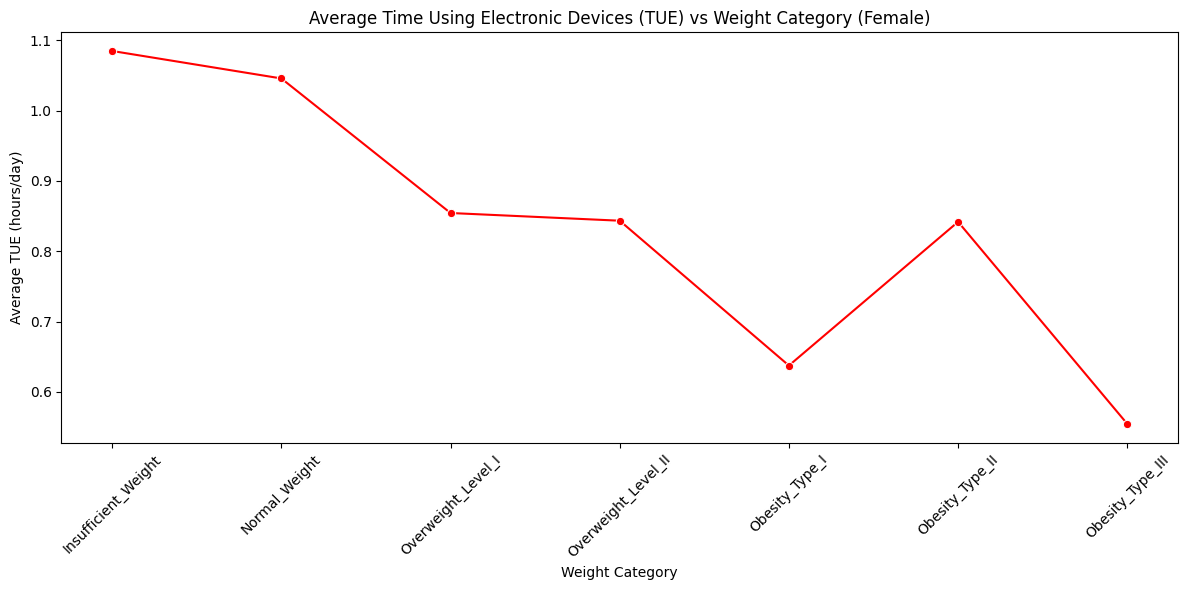

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average TUE per weight category for females
avg_tue_female = df[df['Gender'] == 'Female'].groupby('WeightCategory')['FAF'].mean().reindex(order)

# Plot line graph
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_tue_female.index, y=avg_tue_female.values, marker='o', color='red')

plt.title('Average Time Using Electronic Devices (TUE) vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('Average TUE (hours/day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


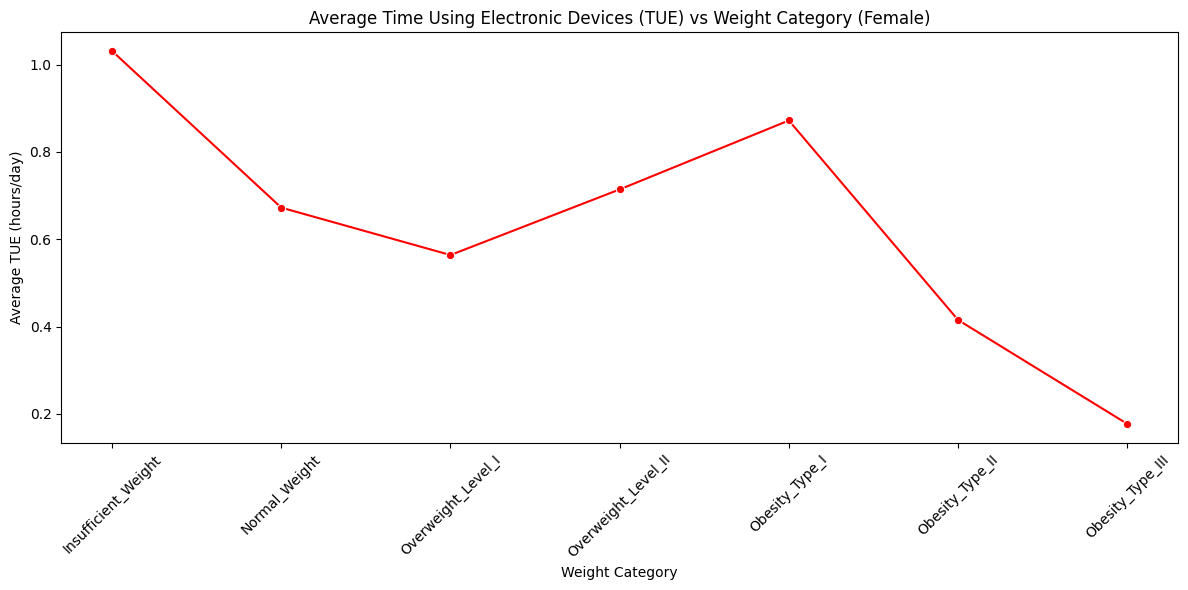

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average TUE per weight category for females
avg_tue_female = df[df['Gender'] == 'Male'].groupby('WeightCategory')['TUE'].mean().reindex(order)

# Plot line graph
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_tue_female.index, y=avg_tue_female.values, marker='o', color='red')

plt.title('Average Time Using Electronic Devices (TUE) vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('Average TUE (hours/day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


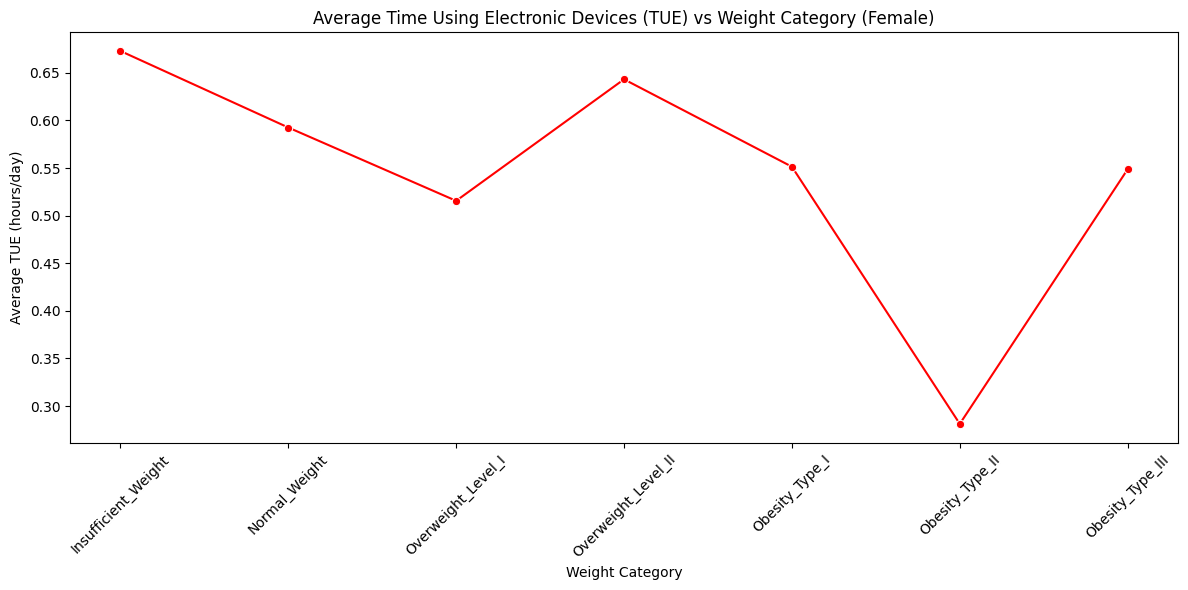

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average TUE per weight category for females
avg_tue_female = df[df['Gender'] == 'Female'].groupby('WeightCategory')['TUE'].mean().reindex(order)

# Plot line graph
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_tue_female.index, y=avg_tue_female.values, marker='o', color='red')

plt.title('Average Time Using Electronic Devices (TUE) vs Weight Category (Female)')
plt.xlabel('Weight Category')
plt.ylabel('Average TUE (hours/day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Male correlation ---
df_male = df[df['Gender'] == 'Male']

# Selecting only numeric columns
numeric_cols_m = df_male[['Age','Height','Weight','BMI','NCP','FAVC','FCVC','CH2O','FAF','TUE','CALC','CAEC_num']]
corr_male = numeric_cols_m.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_male, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - Male')
plt.show()

# --- Female correlation ---
df_female = df[df['Gender'] == 'Female']

# Selecting only numeric columns
numeric_cols_f = df_female[['Age','Height','Weight','BMI','NCP','FAVC','FCVC','CH2O','FAF','TUE','CALC','CAEC_num']]
corr_female = numeric_cols_f.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_female, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - Female')
plt.show()


ValueError: could not convert string to float: 'Sometimes'

In [83]:
# Strip spaces and lowercase
df['CAEC_clean'] = df['CAEC'].astype(str).str.strip().str.lower()

# Define mapping (all lowercase)
caec_mapping = {'no':0, 'sometimes':1, 'frequently':2, 'always':3}

# Map to numeric
df['CAEC_num'] = df['CAEC_clean'].map(caec_mapping)

# Check for unmapped values
unmapped = df[df['CAEC_num'].isna()]['CAEC'].unique()
print("Unmapped CAEC values:", unmapped)


Unmapped CAEC values: []


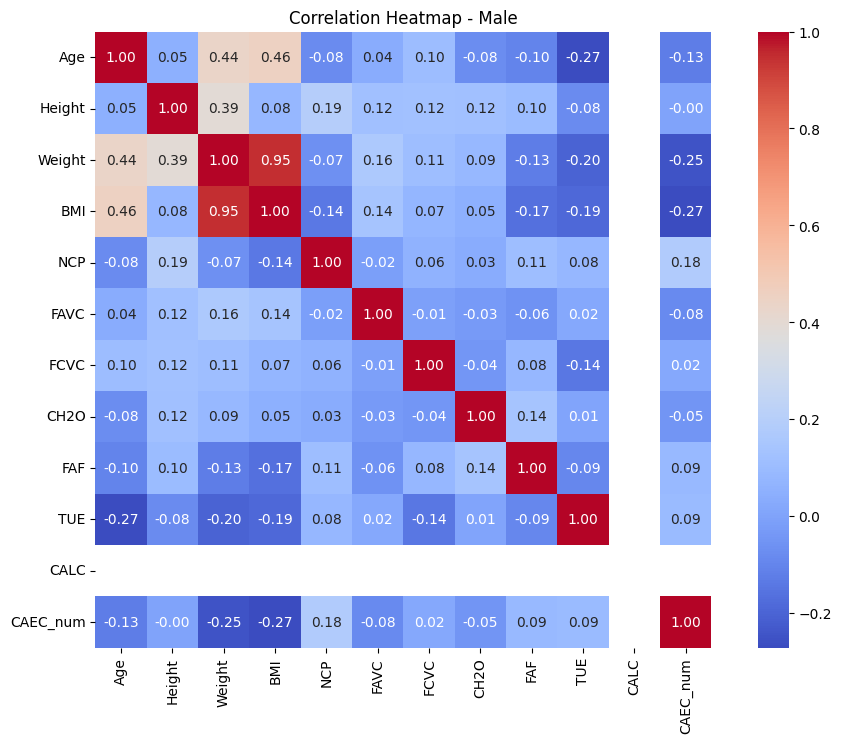

In [84]:
# Select numeric columns
numeric_cols_m = df[df['Gender']=='Male'][['Age','Height','Weight','BMI','NCP','FAVC','FCVC','CH2O','FAF','TUE','CALC','CAEC_num']]

# Ensure everything is numeric
numeric_cols_m = numeric_cols_m.apply(pd.to_numeric, errors='coerce')

# Correlation heatmap
corr_male = numeric_cols_m.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_male, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - Male')
plt.show()


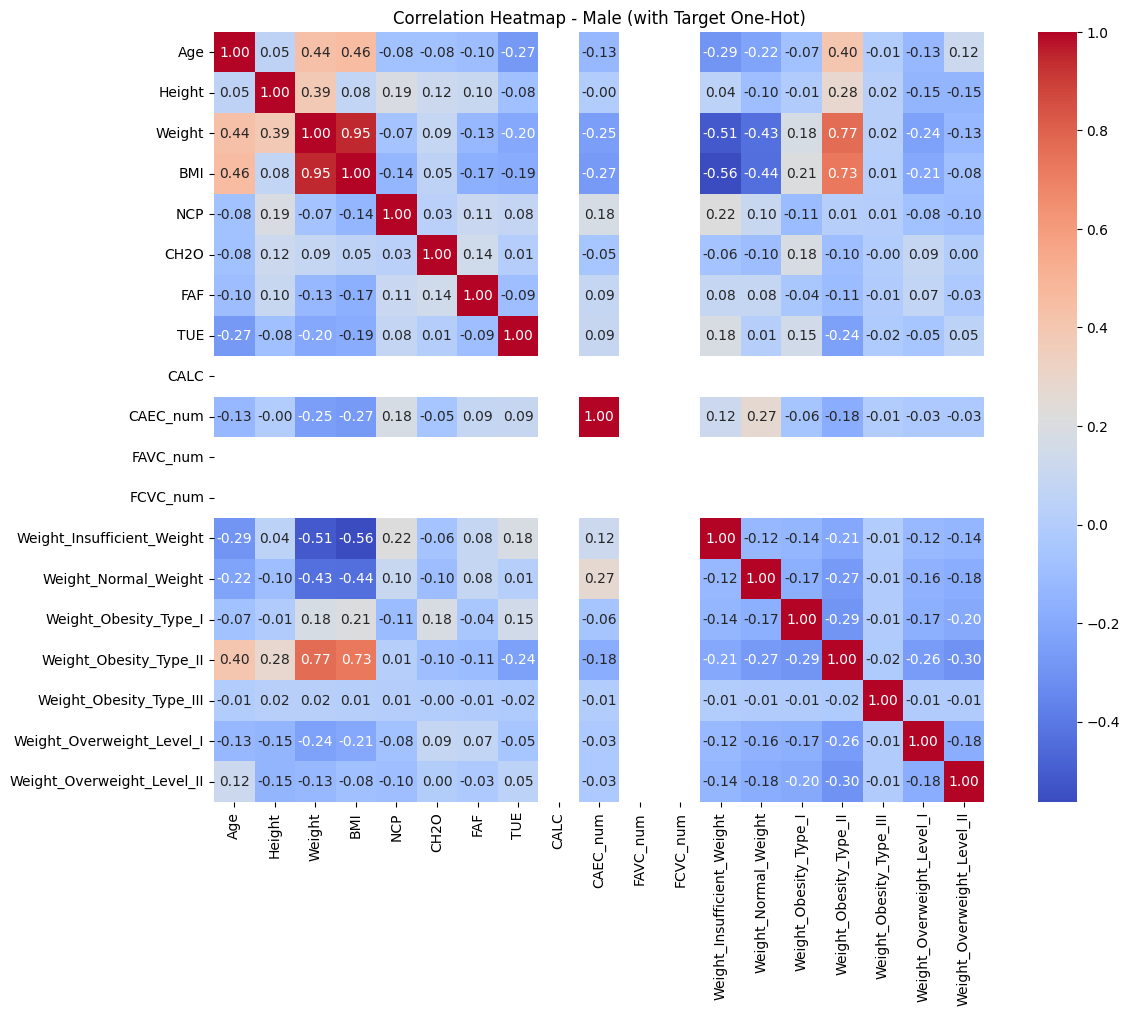

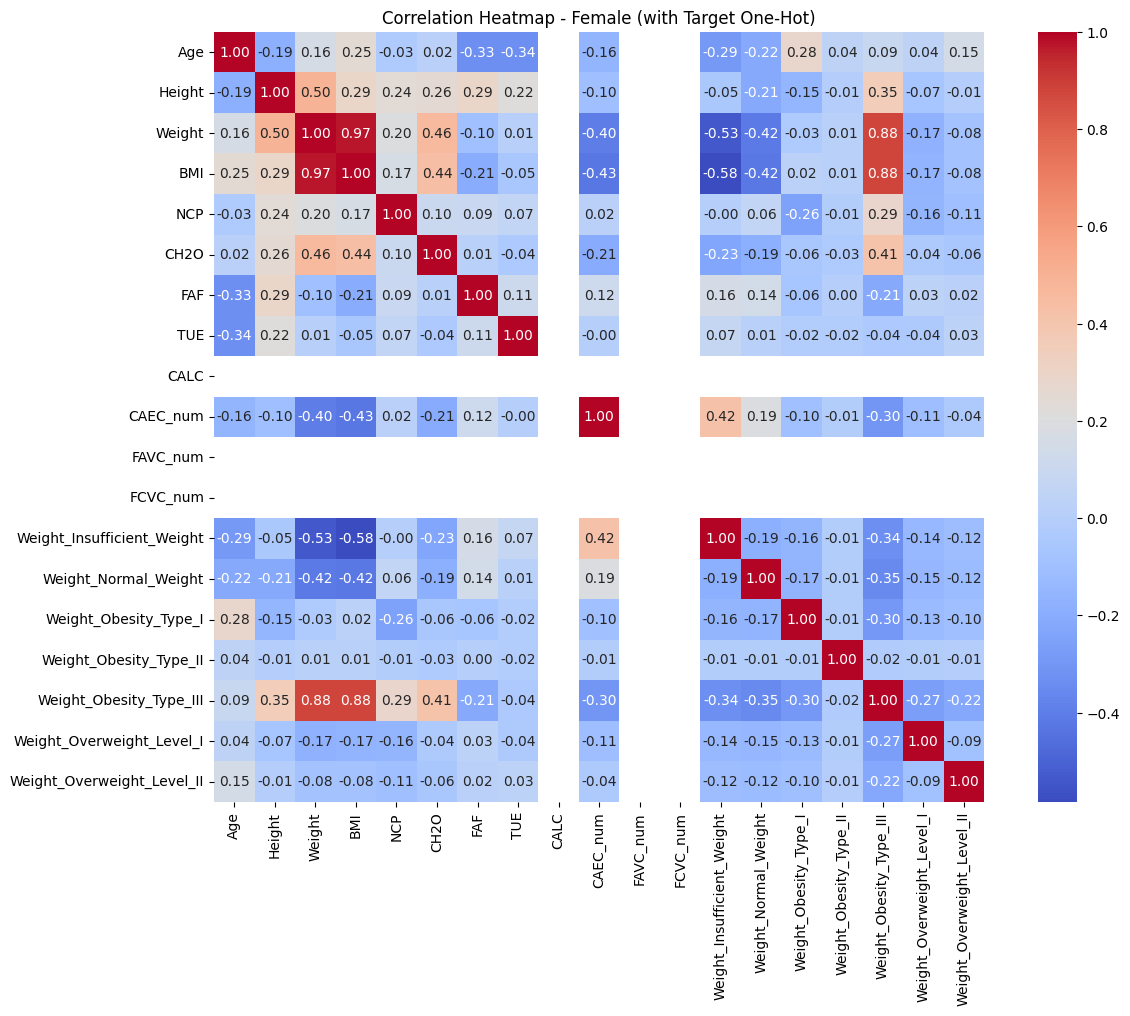

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Clean ordinal/categorical columns ---
# Strip spaces and lowercase
df['CAEC_clean'] = df['CAEC'].astype(str).str.strip().str.lower()
df['FAVC_clean'] = df['FAVC'].astype(str).str.strip().str.lower()
df['FCVC_clean'] = df['FCVC'].astype(str).str.strip().str.lower()

# Map ordinal/categorical to numeric
caec_mapping = {'no':0, 'sometimes':1, 'frequently':2, 'always':3}
yes_no_mapping = {'yes':1, 'no':0, 'sometimes':2}  # adapt based on your data

df['CAEC_num'] = df['CAEC_clean'].map(caec_mapping)
df['FAVC_num'] = df['FAVC_clean'].map(yes_no_mapping)
df['FCVC_num'] = df['FCVC_clean'].map(yes_no_mapping)

# --- Step 2: One-hot encode target ---
df_target_ohe = pd.get_dummies(df['WeightCategory'], prefix='Weight')

# --- Step 3: Select numeric features + one-hot target ---
numeric_cols = ['Age','Height','Weight','BMI','NCP','CH2O','FAF','TUE','CALC','CAEC_num','FAVC_num','FCVC_num']
df_corr_ready = pd.concat([df[numeric_cols], df_target_ohe], axis=1)

# --- Step 4: Split by gender ---
df_male_corr = df_corr_ready[df['Gender']=='Male'].apply(pd.to_numeric, errors='coerce')
df_female_corr = df_corr_ready[df['Gender']=='Female'].apply(pd.to_numeric, errors='coerce')

# --- Step 5: Plot correlation heatmaps ---
plt.figure(figsize=(14,10))
sns.heatmap(df_male_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - Male (with Target One-Hot)')
plt.show()

plt.figure(figsize=(14,10))
sns.heatmap(df_female_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - Female (with Target One-Hot)')
plt.show()


In [ ]:
# Filter people who are labeled as 'Insufficient_Weight' but have BMI > 25
wrong_bmi = df[(df['WeightCategory'] == 'Insufficient_Weight') & (df['BMI'] > 25)]

# Show a few examples
print(wrong_bmi.head())

# Optionally count them
print("\nCount of inconsistent records:", len(wrong_bmi))


        id  Gender        Age    Height     Weight   
3558  3558  Female  22.087389  1.481682  61.373868  \
4211  4211    Male  18.000000  1.850000  86.000000   
4351  4351    Male  43.238402  1.587546  75.306702   
7321  7321  Female  37.524551  1.544937  62.320629   
7370  7370    Male  19.034033  1.556789  62.877347   

     family_history_with_overweight FAVC      FCVC  NCP        CAEC SMOKE   
3558                            yes  yes  2.000000  3.0   Sometimes    no  \
4211                            yes  yes  3.000000  4.0  Frequently    no   
4351                            yes  yes  2.000000  3.0   Sometimes    no   
7321                            yes  yes  2.000000  3.0   Sometimes    no   
7370                            yes  yes  2.442536  3.0   Sometimes    no   

          CH2O SCC       FAF       TUE       CALC                 MTRANS   
3558  1.278231  no  1.967627  0.000000         no             Automobile  \
4211  2.000000  no  2.000000  1.000000         no  Public_Tr

In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [ ]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']


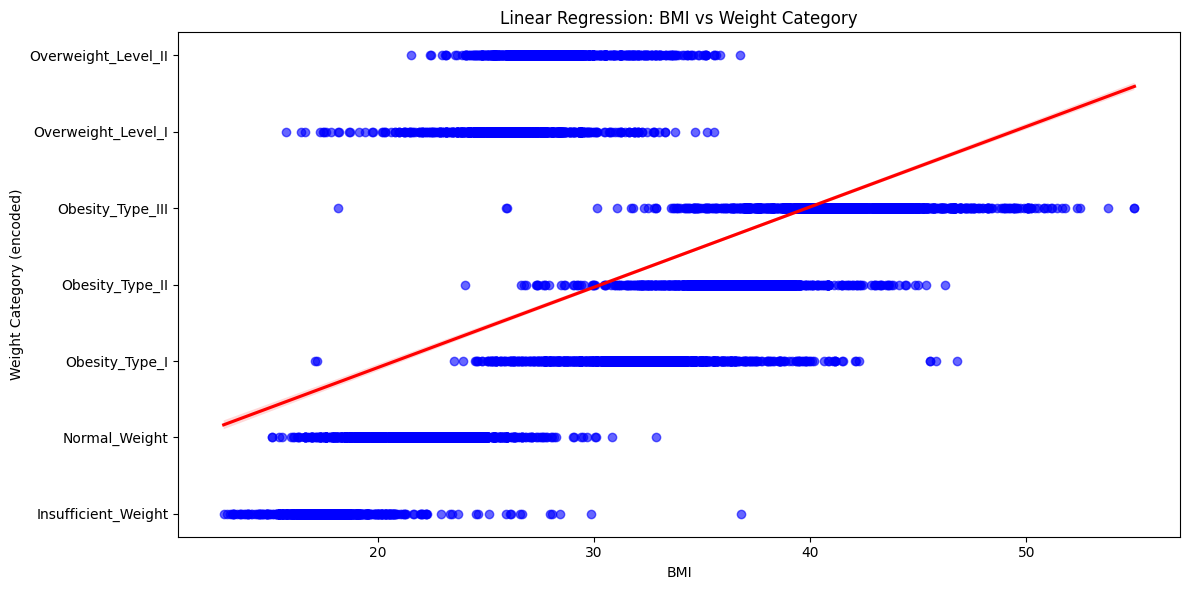

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode WeightCategory as numeric for regression
le = LabelEncoder()
df['WeightCategory_num'] = le.fit_transform(df['WeightCategory'])

plt.figure(figsize=(12,6))
sns.regplot(
    x='BMI',
    y='WeightCategory_num',
    data=df,
    scatter_kws={'alpha':0.6, 'color':'blue'},
    line_kws={'color':'red'}
)

plt.title('Linear Regression: BMI vs Weight Category')
plt.xlabel('BMI')
plt.ylabel('Weight Category (encoded)')
plt.yticks(ticks=range(len(le.classes_)), labels=le.classes_)
plt.tight_layout()
plt.show()


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode target
le = LabelEncoder()
df['WeightCategory_num'] = le.fit_transform(df['WeightCategory'])

# Features (use BMI only for simplicity)
X = df[['BMI']]
y = df['WeightCategory_num']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression (multiclass)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.7959


Overall Accuracy: 0.895397489539749
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       374
      Normal_Weight       0.87      0.90      0.88       469
     Obesity_Type_I       0.88      0.85      0.86       441
    Obesity_Type_II       0.95      0.97      0.96       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.79      0.71      0.74       369
Overweight_Level_II       0.79      0.82      0.81       376

           accuracy                           0.90      3107
          macro avg       0.88      0.88      0.88      3107
       weighted avg       0.89      0.90      0.89      3107



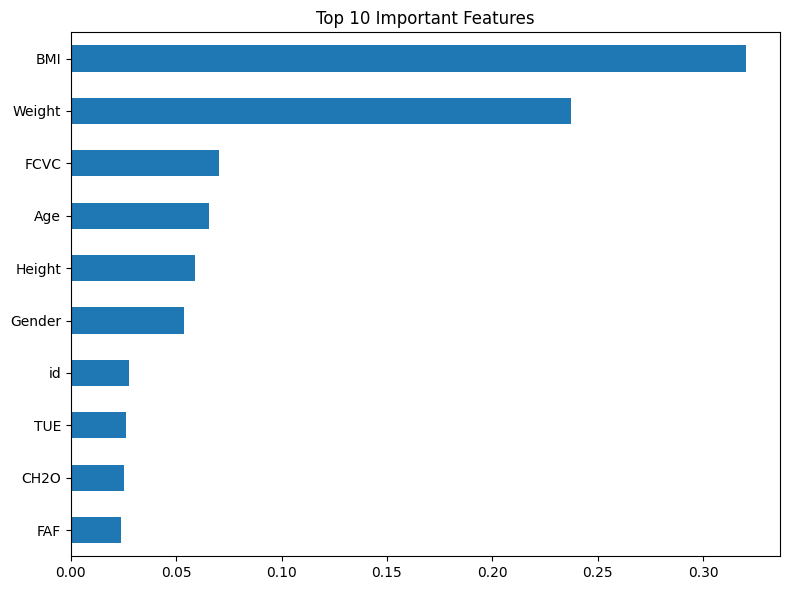

In [ ]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ===============================
# 2. Compute BMI
# ===============================
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# ===============================
# 3. Define Features & Target
# ===============================
target = 'WeightCategory'
X = df.drop(columns=[target])
y = df[target]

# ===============================
# 4. Encode Categorical Columns
# ===============================
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# ===============================
# 5. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ===============================
# 6. Train Random Forest
# ===============================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# ===============================
# 7. Evaluate Model
# ===============================
y_pred = rf.predict(X_test)
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ===============================
# 8. Feature Importance (Optional)
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()


In [87]:
# Count number of males and females
gender_counts = df['Gender'].value_counts()
print(gender_counts)


Gender
Male      7783
Female    7750
Name: count, dtype: int64


==== Male Model Performance ====
Accuracy: 0.882466281310212
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.96      0.94       136
      Normal_Weight       0.90      0.85      0.87       214
     Obesity_Type_I       0.87      0.85      0.86       251
    Obesity_Type_II       0.95      0.97      0.96       480
   Obesity_Type_III       0.00      0.00      0.00         1
 Overweight_Level_I       0.77      0.80      0.78       210
Overweight_Level_II       0.82      0.81      0.82       265

           accuracy                           0.88      1557
          macro avg       0.75      0.75      0.75      1557
       weighted avg       0.88      0.88      0.88      1557


==== Female Model Performance ====
Accuracy: 0.9103225806451613
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.93      0.92       237
      Normal_Weight       0.88      0.85      0.87       255
     Obesity_Typ

C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

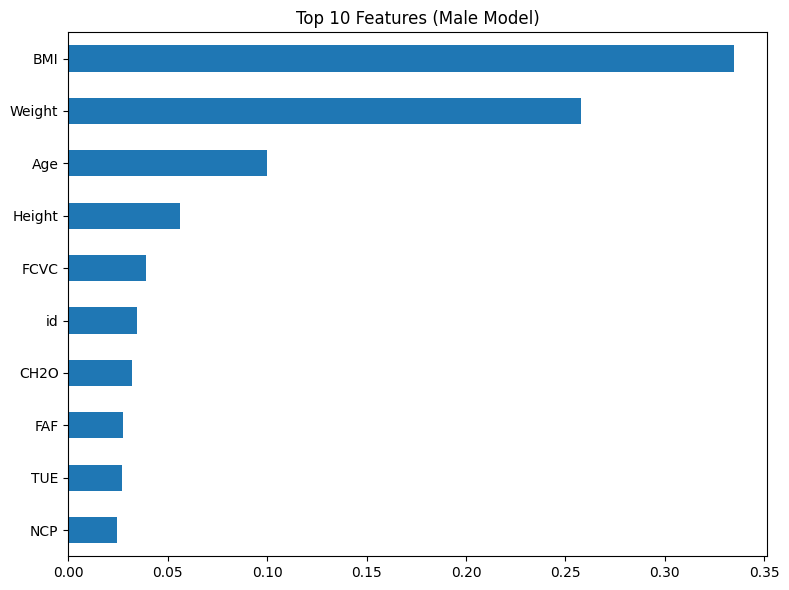

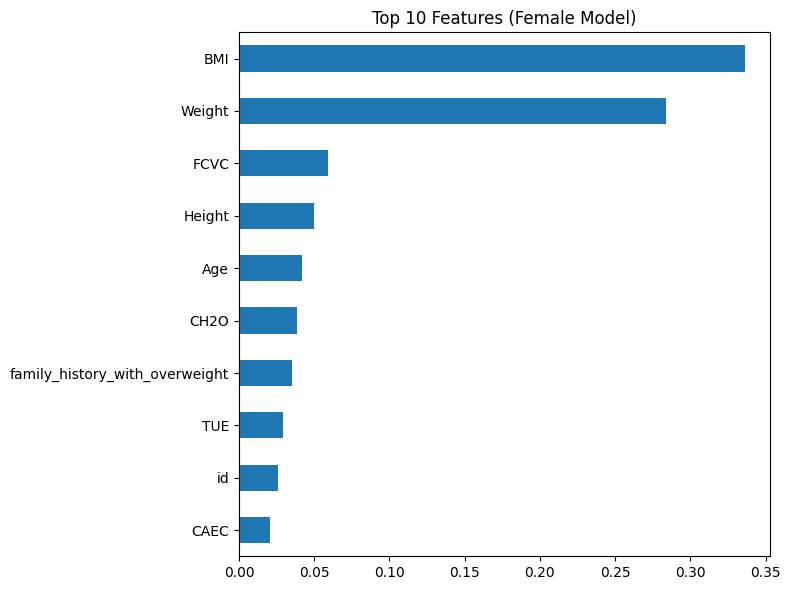

In [ ]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ===============================
# 2. Compute BMI
# ===============================
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# ===============================
# 3. Split Dataset by Gender
# ===============================
df_male = df[df['Gender'] == 'Male'].copy()
df_female = df[df['Gender'] == 'Female'].copy()

target = 'WeightCategory'

# ===============================
# 4. Function to Prepare Data
# ===============================
def prepare_data(df_gender):
    X = df_gender.drop(columns=[target])
    y = df_gender[target]
    le = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prepare Male and Female Data
X_train_m, X_test_m, y_train_m, y_test_m = prepare_data(df_male)
X_train_f, X_test_f, y_train_f, y_test_f = prepare_data(df_female)

# ===============================
# 5. Train Models
# ===============================
rf_male = RandomForestClassifier(random_state=42)
rf_female = RandomForestClassifier(random_state=42)

rf_male.fit(X_train_m, y_train_m)
rf_female.fit(X_train_f, y_train_f)

# ===============================
# 6. Evaluate Models
# ===============================
y_pred_m = rf_male.predict(X_test_m)
y_pred_f = rf_female.predict(X_test_f)

print("==== Male Model Performance ====")
print("Accuracy:", accuracy_score(y_test_m, y_pred_m))
print(classification_report(y_test_m, y_pred_m))

print("\n==== Female Model Performance ====")
print("Accuracy:", accuracy_score(y_test_f, y_pred_f))
print(classification_report(y_test_f, y_pred_f))

# ===============================
# 7. Feature Importance (Optional)
# ===============================
def plot_feature_importance(model, X, title):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8,6))
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_male, X_train_m, "Top 10 Features (Male Model)")
plot_feature_importance(rf_female, X_train_f, "Top 10 Features (Female Model)")


In [122]:
# ===============================
# 0. Clean Data
# ===============================

# Replace infinite values with NaN
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop rows with any NaN values
df.dropna(inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)


In [123]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ===============================
# 2. Compute BMI
# ===============================
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# ===============================
# 3. Split Dataset by Gender
# ===============================
df_male = df[df['Gender'] == 'Male'].copy()
df_female = df[df['Gender'] == 'Female'].copy()

target = 'WeightCategory'

# Drop columns not needed for model
drop_cols = ['id', 'Height', 'Weight']

df_male.drop(columns=drop_cols, inplace=True)
df_female.drop(columns=drop_cols, inplace=True)

# ===============================
# 4. Function to Prepare Data
# ===============================
def prepare_data(df_gender):
    X = df_gender.drop(columns=[target])
    y = df_gender[target]
    le = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prepare Male and Female Data
X_train_m, X_test_m, y_train_m, y_test_m = prepare_data(df_male)
X_train_f, X_test_f, y_train_f, y_test_f = prepare_data(df_female)

# ===============================
# 5. Train Models
# ===============================
rf_male = RandomForestClassifier(random_state=42)
rf_female = RandomForestClassifier(random_state=42)

rf_male.fit(X_train_m, y_train_m)
rf_female.fit(X_train_f, y_train_f)

# ===============================
# 6. Evaluate Models
# ===============================
y_pred_m = rf_male.predict(X_test_m)
y_pred_f = rf_female.predict(X_test_f)

print("==== Male Model Performance ====")
print("Accuracy:", accuracy_score(y_test_m, y_pred_m))
print(classification_report(y_test_m, y_pred_m))

print("\n==== Female Model Performance ====")
print("Accuracy:", accuracy_score(y_test_f, y_pred_f))
print(classification_report(y_test_f, y_pred_f))

# ===============================
# 7. Feature Importance (Optional)
# ===============================
def plot_feature_importance(model, X, title):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8,6))
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_male, X_train_m, "Top 10 Features (Male Model)")
plot_feature_importance(rf_female, X_train_f, "Top 10 Features (Female Model)")


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.